# Midterm Visualizations

In [40]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('finalized_county.csv', parse_dates=['date'])
df.sort_values(['county', 'date'], inplace=True)
df['entity'] = df['state'] + '-' + df['county']
df

Unnamed: 0       date   county   state   cases  deaths  \
1350         194 2020-03-10    Clark  Nevada       2     0.0   
1351         206 2020-03-11    Clark  Nevada       5     0.0   
1352         218 2020-03-12    Clark  Nevada       8     0.0   
1353         230 2020-03-13    Clark  Nevada      16     0.0   
1354         242 2020-03-14    Clark  Nevada      16     0.0   
...          ...        ...      ...     ...     ...     ...   
3235        3380 2020-11-30  Tarrant   Texas  100650  1026.0   
3236        3392 2020-12-01  Tarrant   Texas  102051  1043.0   
3237        3404 2020-12-02  Tarrant   Texas  103781  1054.0   
3238        3416 2020-12-03  Tarrant   Texas  105675  1067.0   
3239        3428 2020-12-04  Tarrant   Texas  107178  1077.0   

     stay_at_home_announced stay_at_home_effective        lat         lon  \
1350                     no                     no  36.215243 -115.013549   
1351                     no                     no  36.215243 -115.013549   
1352                     no                     no  36.215243 -115.013549   
1353                     no                     no  36.215243 -115.013549   
1354                     no                     no  36.215243 -115.013549   
...                     ...                    ...        ...         ...   
3235                    yes                    yes  32.771568  -97.291235   
3236                    yes                    yes  32.771568  -97.291235   
3237                    yes                    yes  32.771568  -97.291235   
3238                    yes                    yes  32.771568  -97.291235   
3239                    yes                    yes  32.771568  -97.291235   

      ...  min_temp_10d_avg  min_temp_15d_avg  dewpoint_3d_avg  \
1350  ...             51.48         49.813333        40.366667   
1351  ...             51.84         49.873333        47.966667   
1352  ...             51.79         49.753333        50.833333   
1353  ...             51.16         49.753333        48.166667   
1354  ...             50.59         50.040000        46.266667   
...   ...               ...               ...              ...   
3235  ...               NaN               NaN        29.666667   
3236  ...               NaN               NaN        26.733333   
3237  ...               NaN               NaN        30.100000   
3238  ...               NaN               NaN        33.633333   
3239  ...               NaN               NaN              NaN   

      dewpoint_5d_avg  dewpoint_10d_avg  dewpoint_15d_avg  \
1350            40.14             40.23         37.640000   
1351            44.20             41.44         38.600000   
1352            47.78             41.90         38.813333   
1353            48.18             42.34         39.486667   
1354            46.16             43.13         39.960000   
...               ...               ...               ...   
3235            33.34               NaN               NaN   
3236            31.50               NaN               NaN   
3237            29.12               NaN               NaN   
3238              NaN               NaN               NaN   
3239              NaN               NaN               NaN   

      date_stay_at_home_announced  date_stay_at_home_effective         entity  \
1350                   2020-04-01                   2020-04-01   Nevada-Clark   
1351                   2020-04-01                   2020-04-01   Nevada-Clark   
1352                   2020-04-01                   2020-04-01   Nevada-Clark   
1353                   2020-04-01                   2020-04-01   Nevada-Clark   
1354                   2020-04-01                   2020-04-01   Nevada-Clark   
...                           ...                          ...            ...   
3235                   2020-03-31                   2020-04-02  Texas-Tarrant   
3236                   2020-03-31                   2020-04-02  Texas-Tarrant   
3237                   2020-03-31                   2020-

In [11]:
value_counts = df['county'].value_counts()
value_counts

county
Los Angeles      270
Orange           270
San Diego        270
Miami-Dade       270
Cook             270
Clark            270
Nassau           270
New York City    270
Suffolk          270
Philadelphia     270
Harris           270
Tarrant          270
Name: count, dtype: int64

# 1. Temporal Visualizations
## Plots: Incremental cases over time

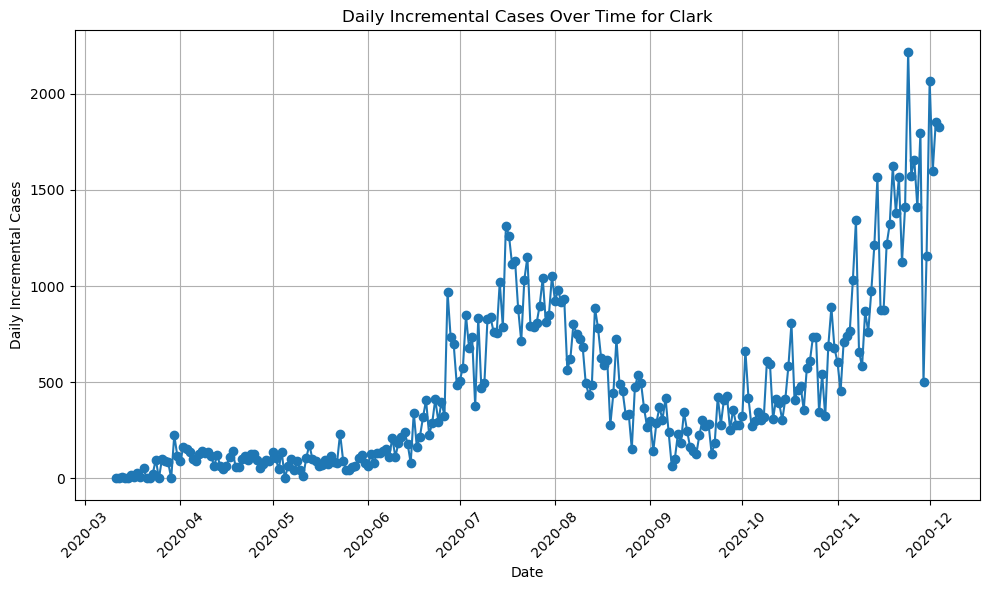

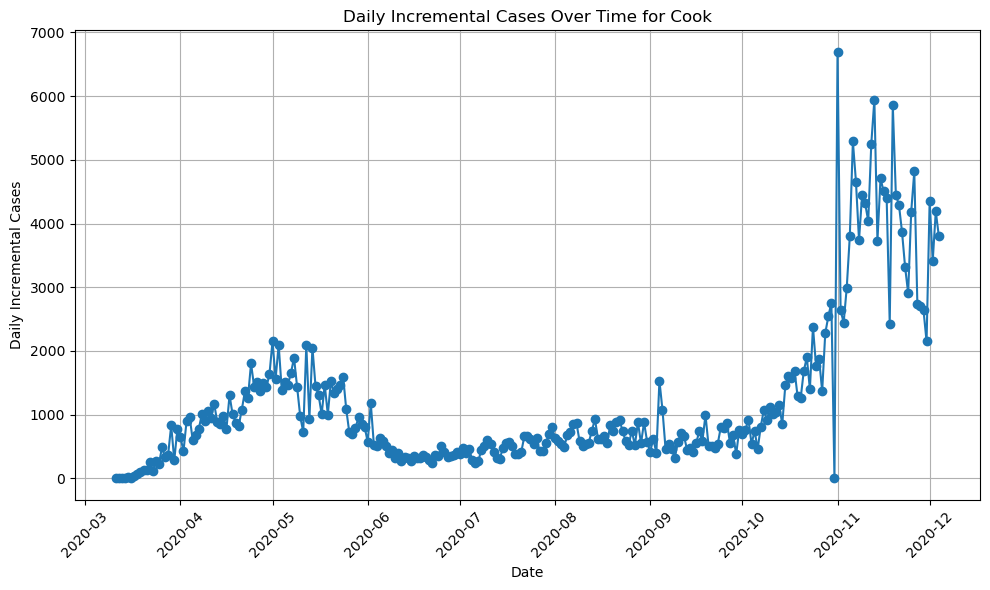

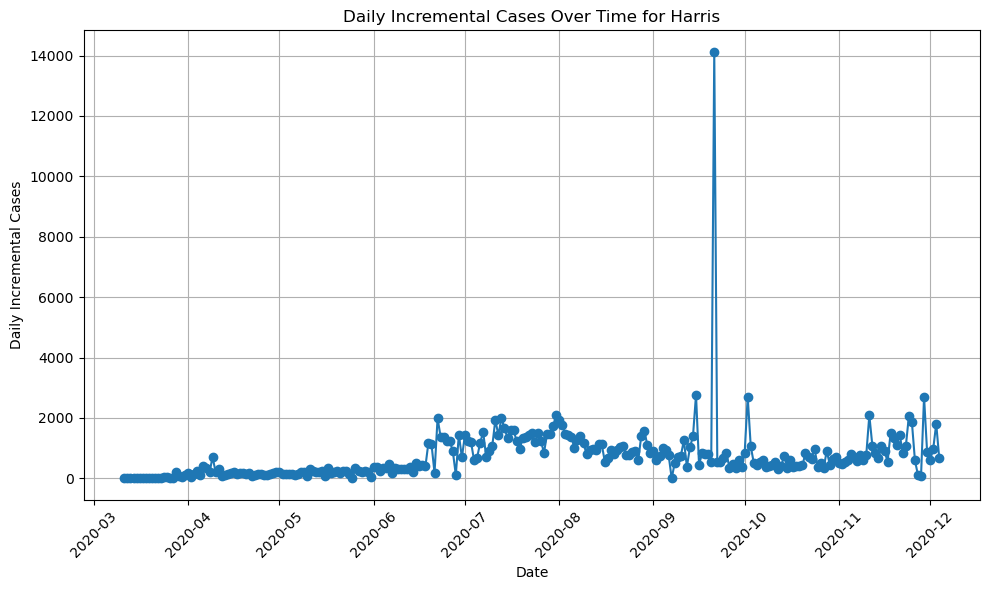

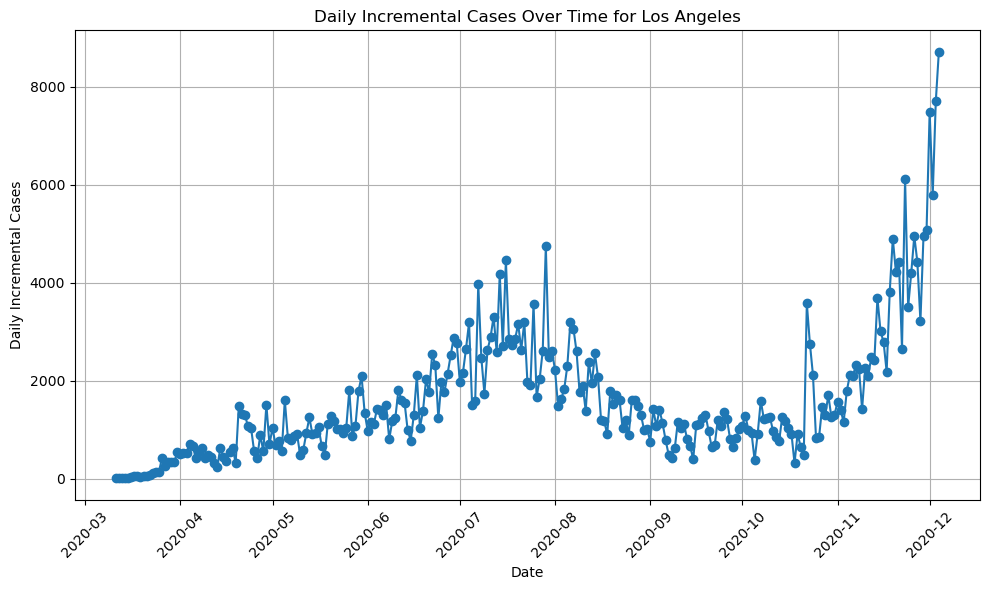

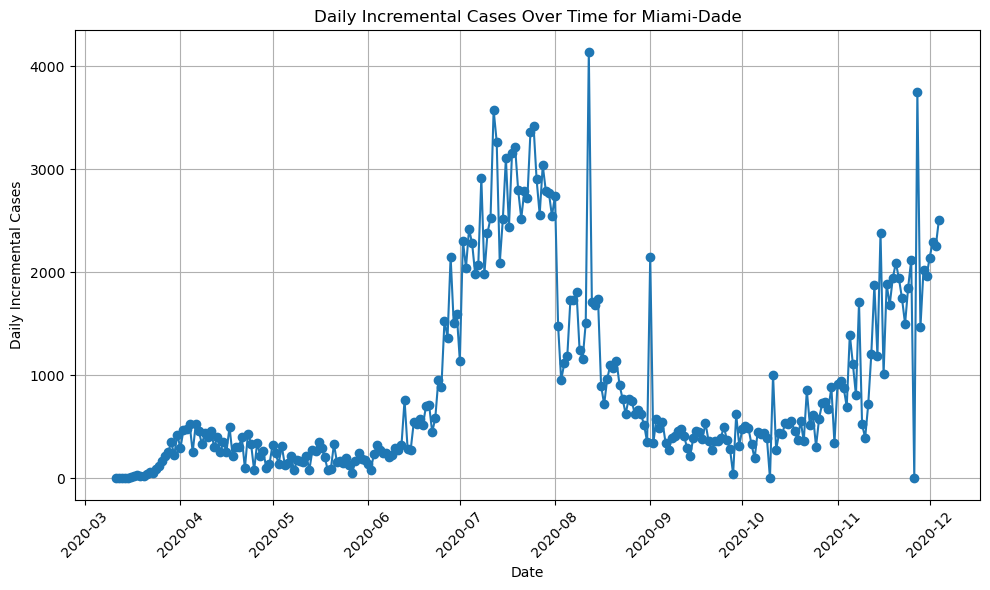

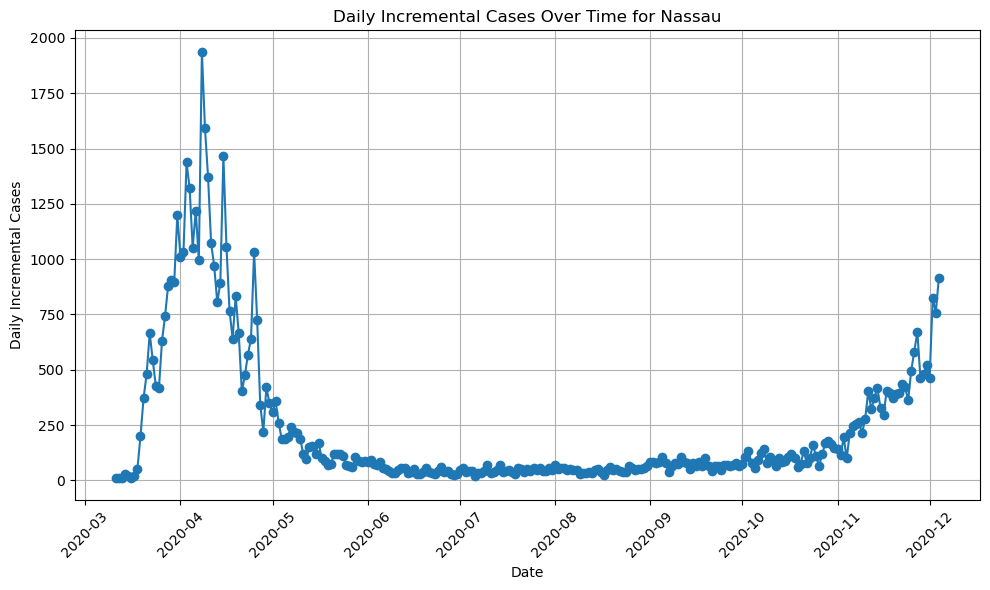

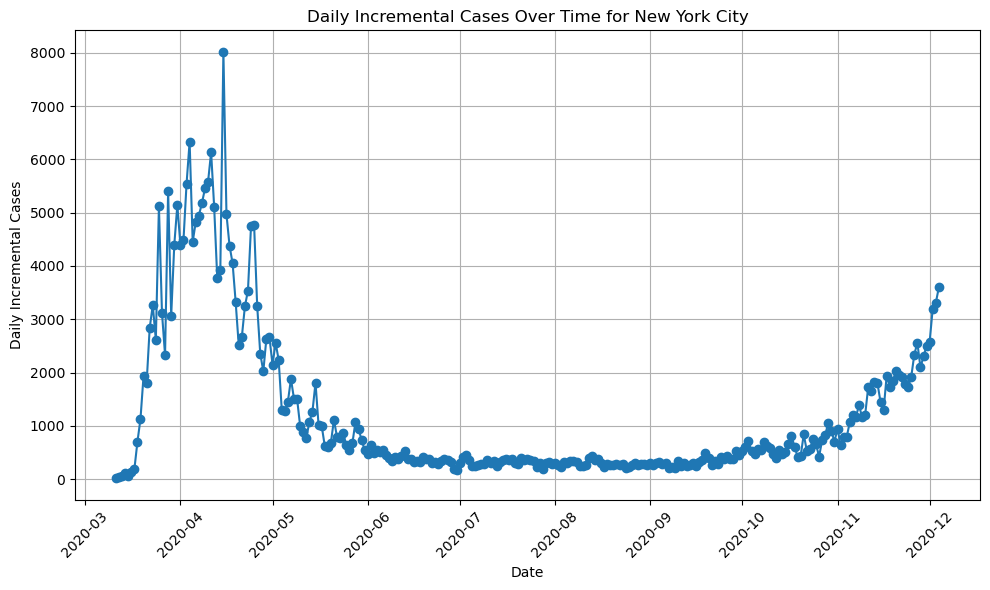

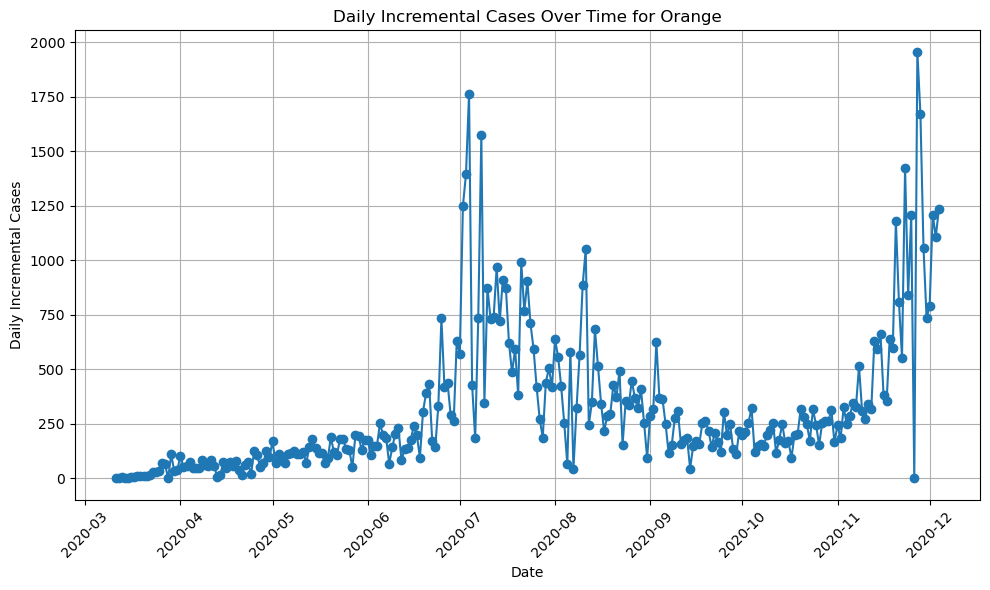

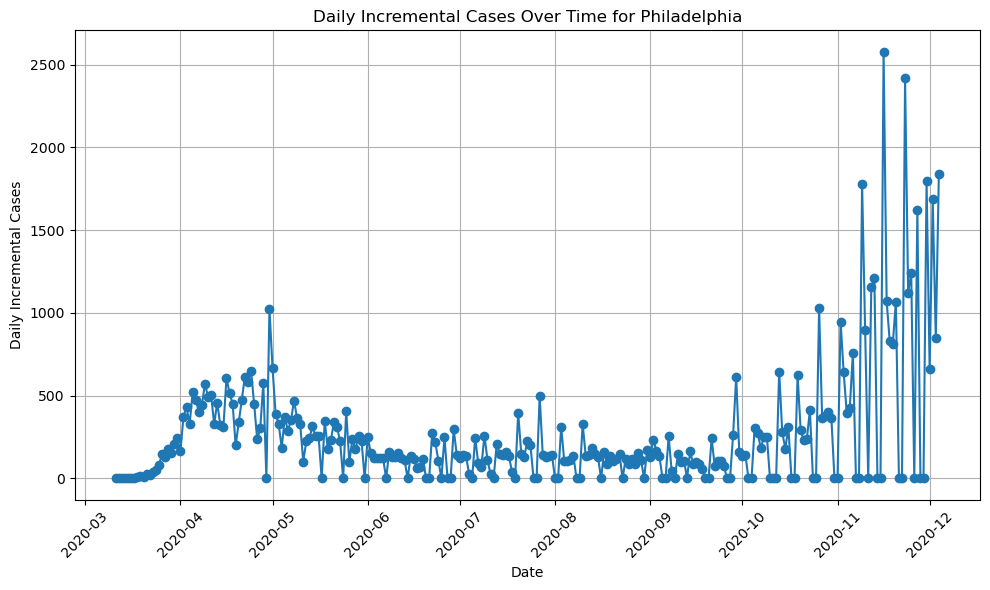

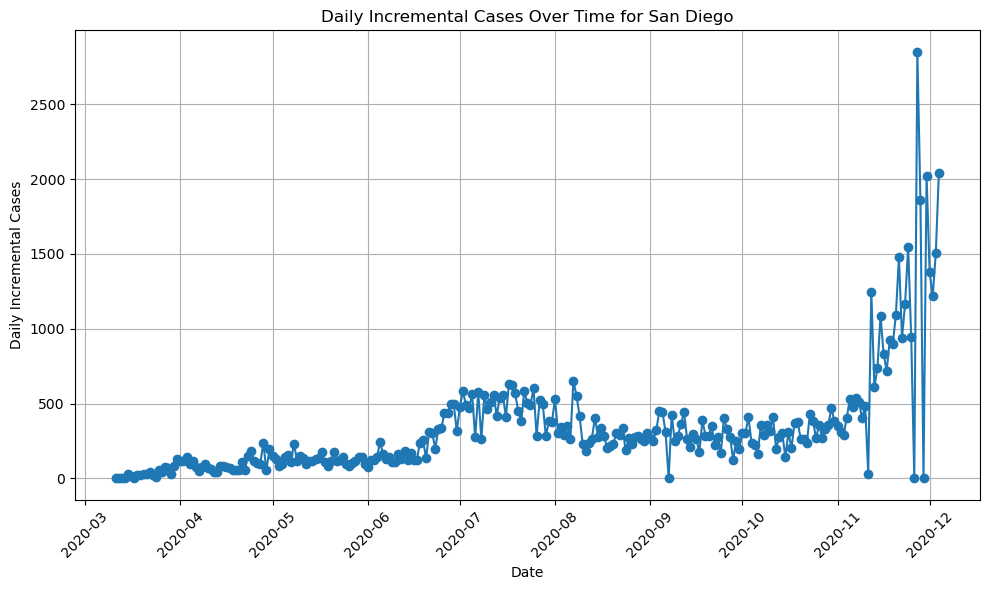

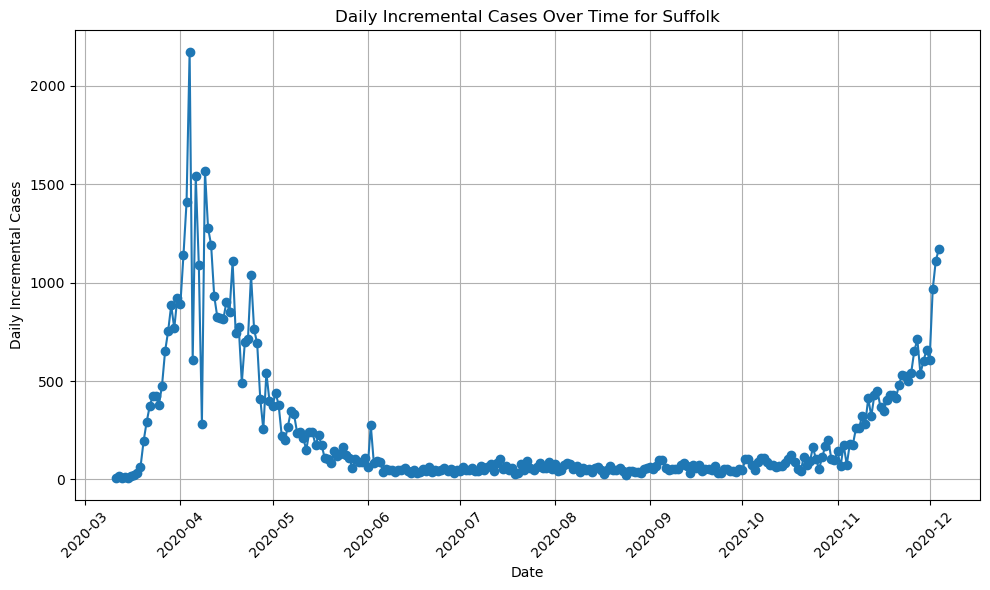

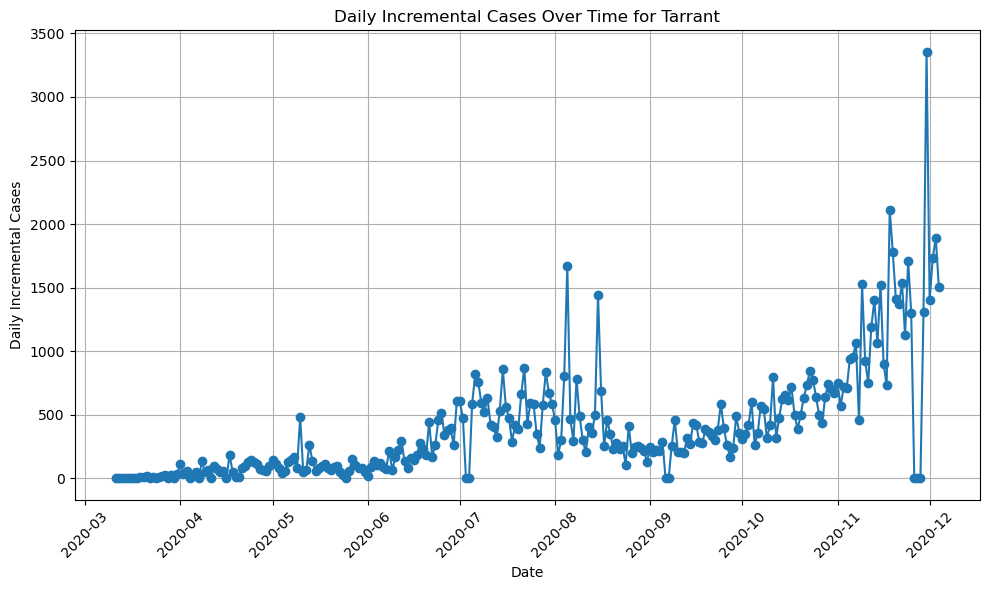

In [41]:
counties = df['county'].unique()

# Separate plots for each county
for county in counties:
    # Filter data for the current county
    county_df = df[df['county'] == county]
    
    # Calculate daily incremental cases for the county
    county_df['DailyCases'] = county_df['cases'].diff()
    
    # Plotting for this county
    plt.figure(figsize=(10, 6))
    plt.plot(county_df['date'], county_df['DailyCases'], marker='o', linestyle='-', label=county)
    plt.title(f'Daily Incremental Cases Over Time for {county}')
    plt.xlabel('Date')
    plt.ylabel('Daily Incremental Cases')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

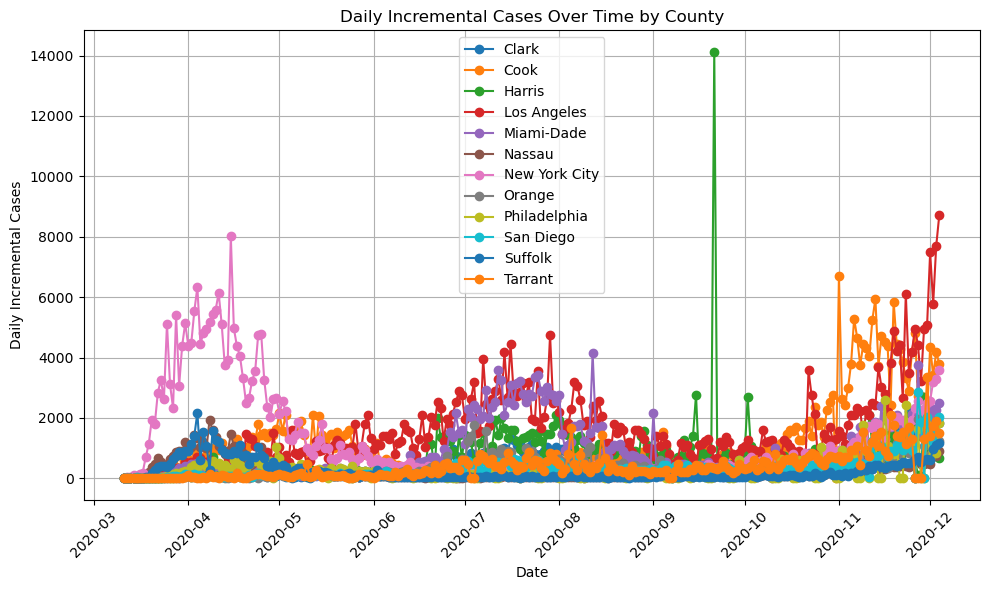

In [42]:
plt.figure(figsize=(10, 6))

for county in counties:
    county_df = df[df['county'] == county]
    county_df['DailyCases'] = county_df['cases'].diff()
    plt.plot(county_df['date'], county_df['DailyCases'], marker='o', linestyle='-', label=county)

plt.title('Daily Incremental Cases Over Time by County')
plt.xlabel('Date')
plt.ylabel('Daily Incremental Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Plots: Incremental deaths over time

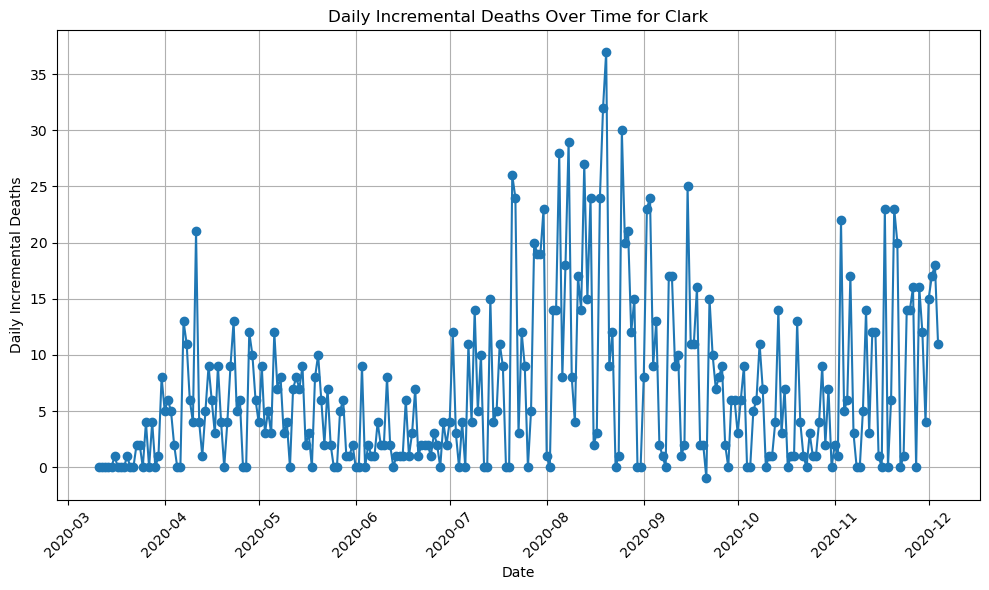

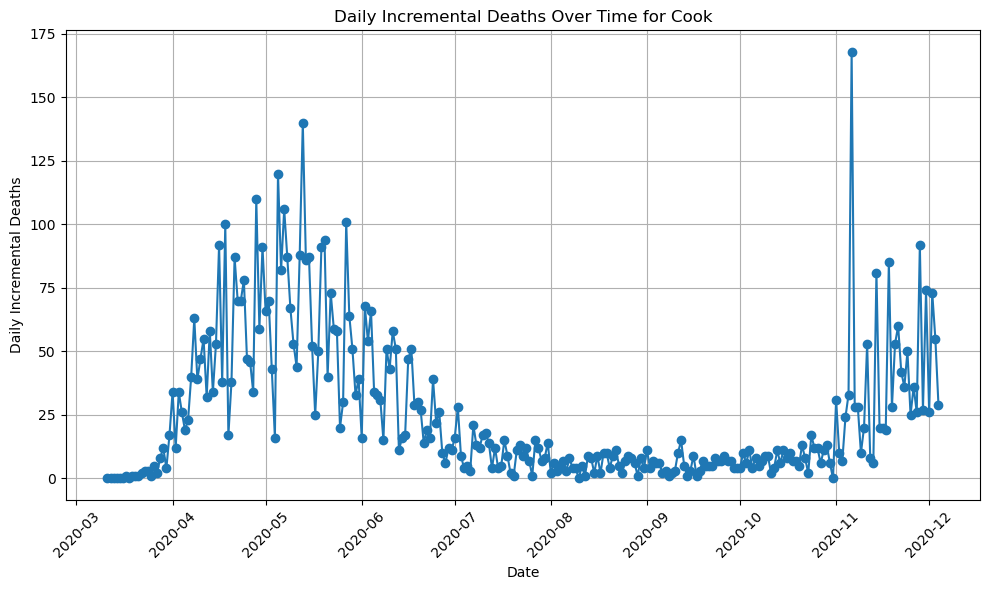

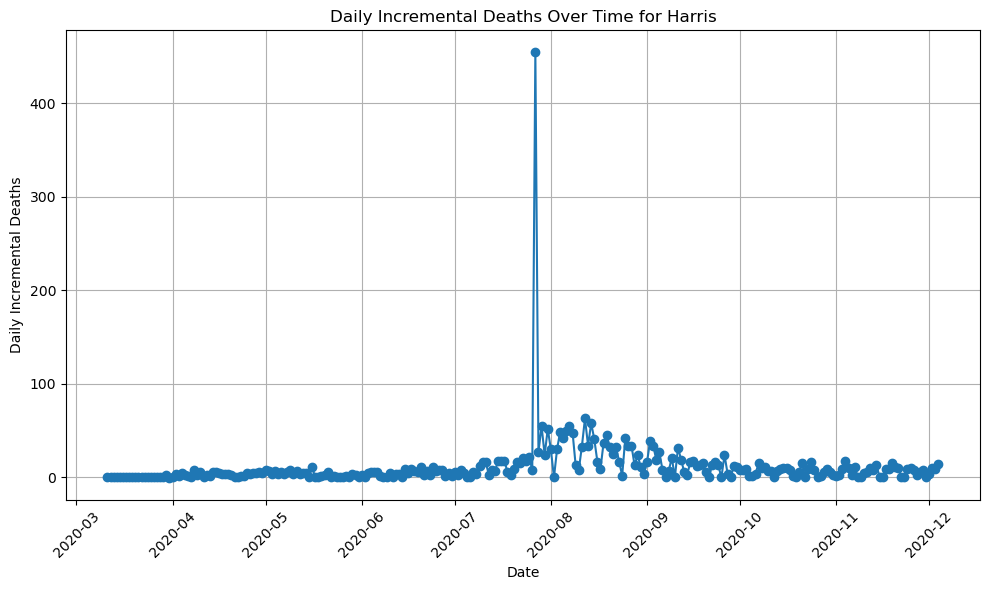

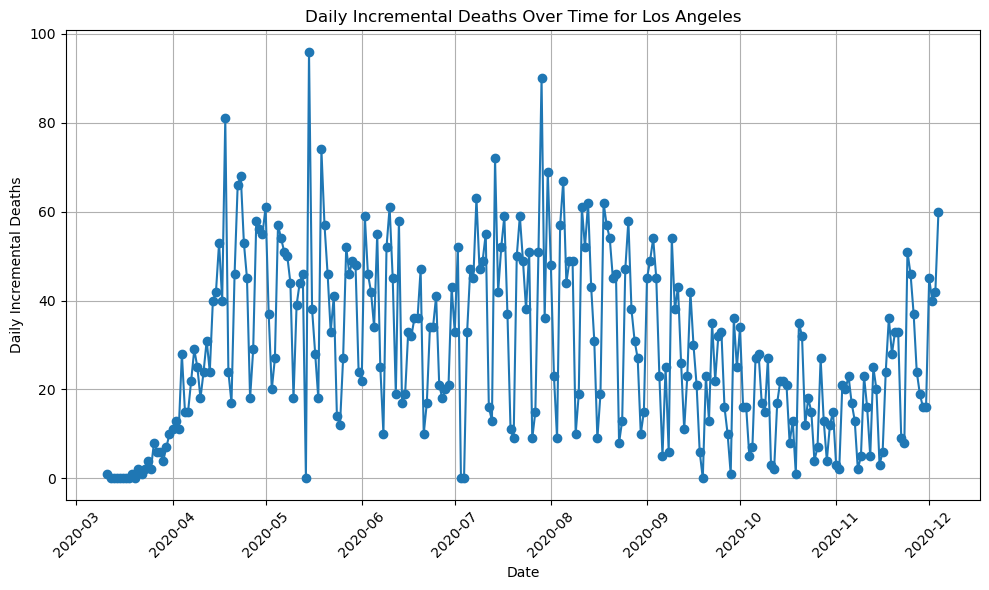

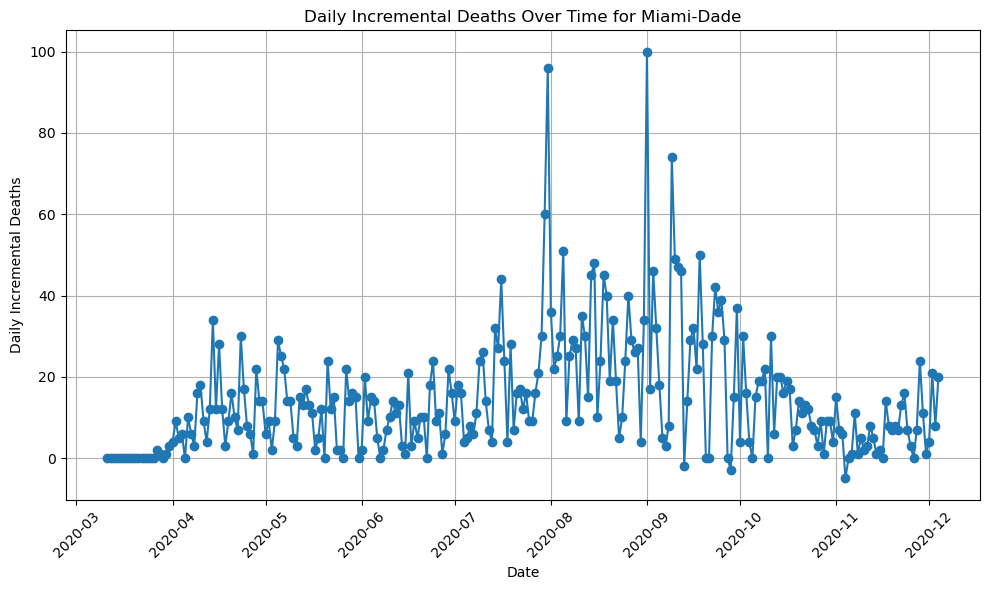

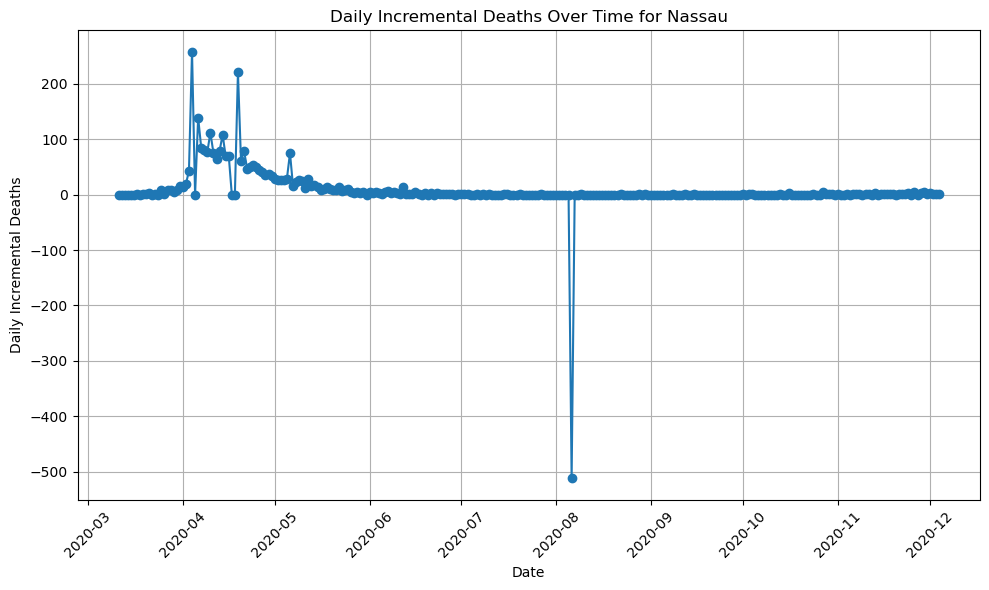

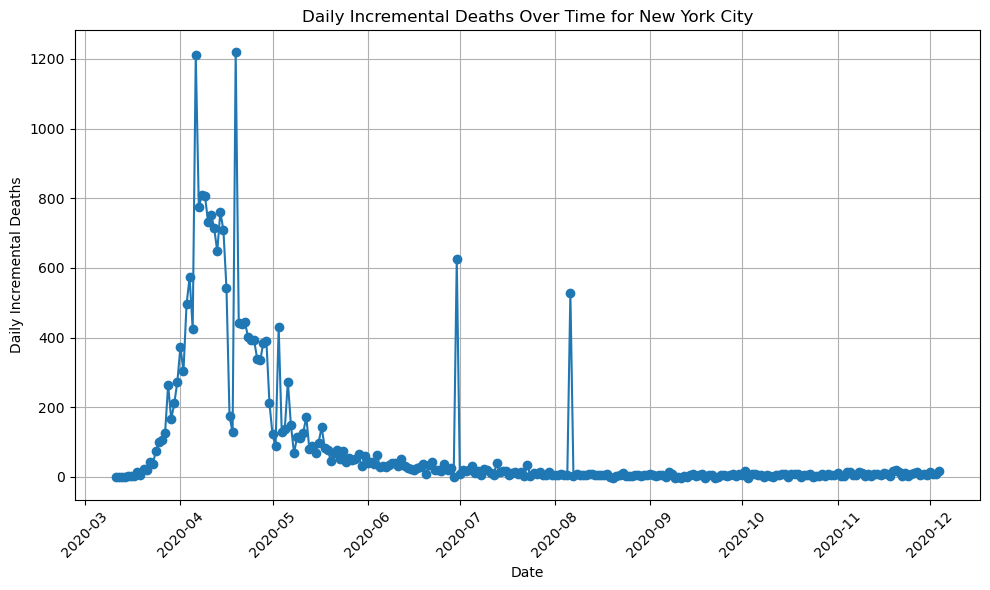

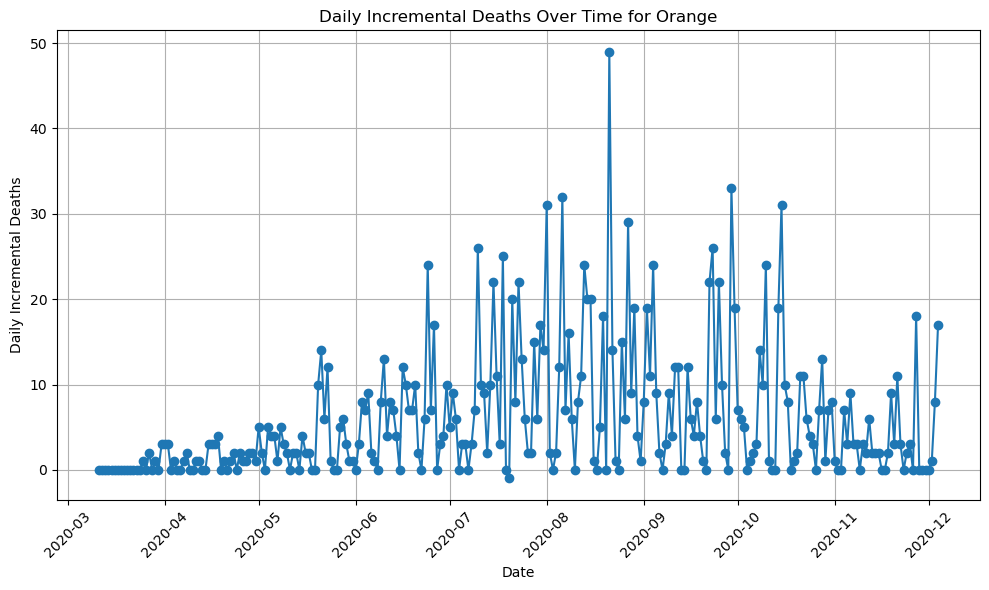

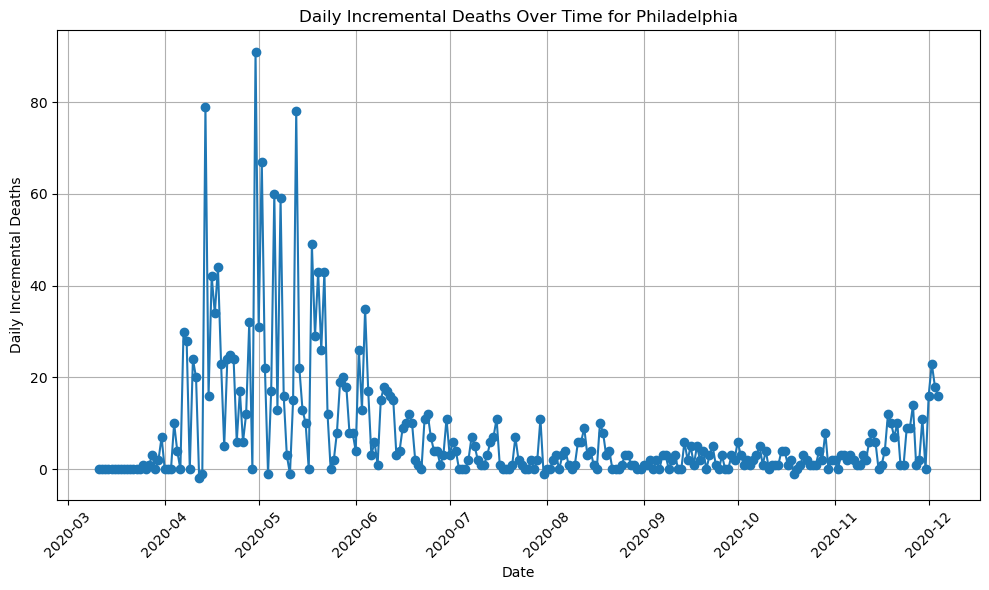

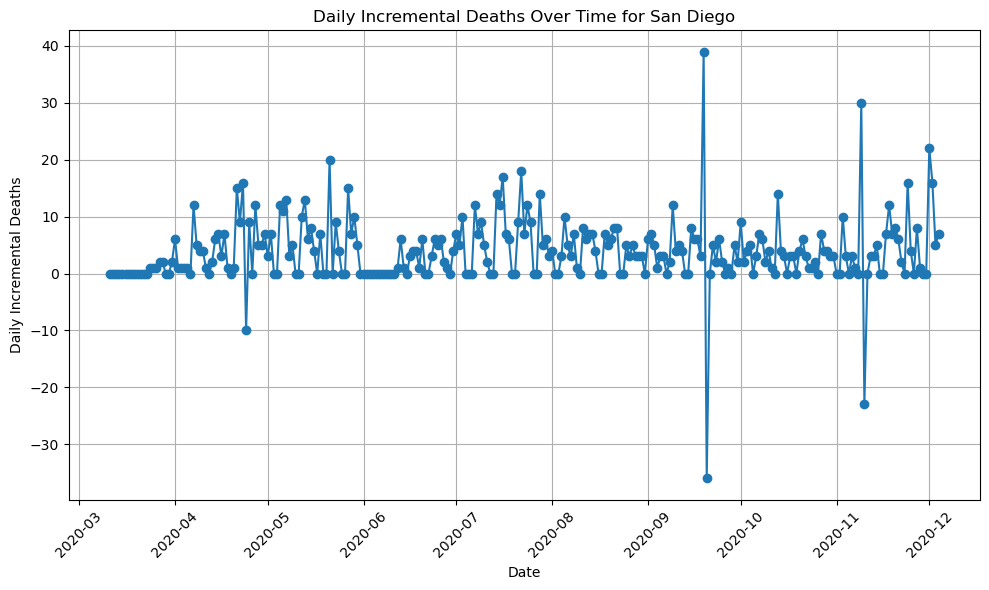

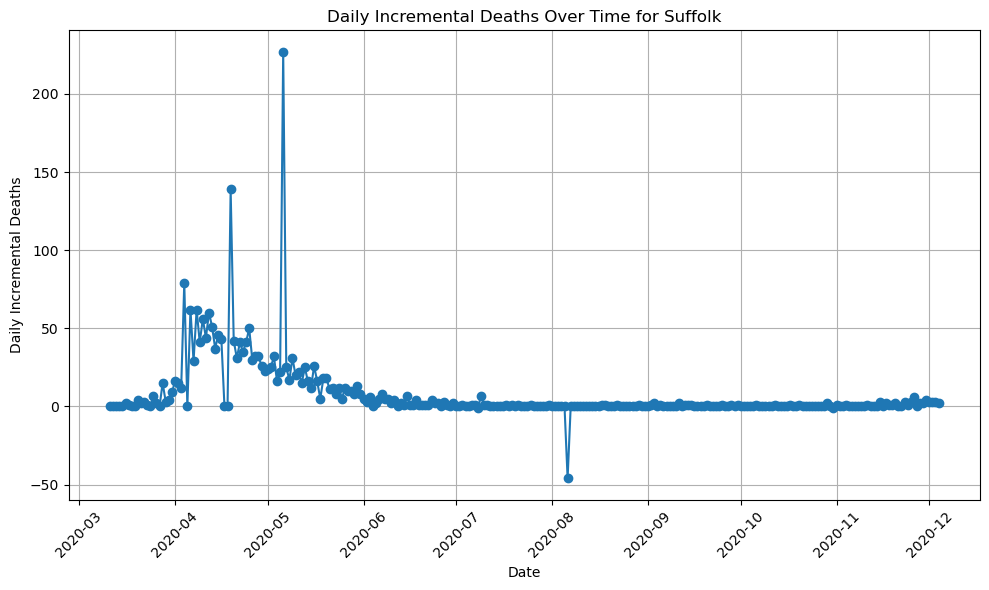

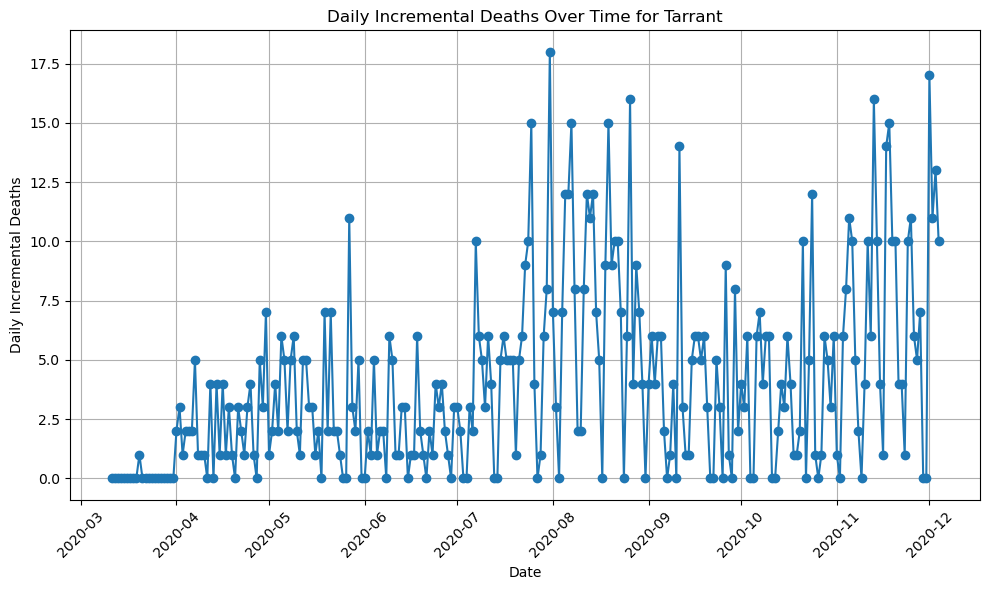

In [43]:
counties = df['county'].unique()

# Separate plots for each county
for county in counties:
    # Filter data for the current county
    county_df = df[df['county'] == county]
    
    # Calculate daily incremental cases for the county
    county_df['DailyDeaths'] = county_df['deaths'].diff()
    
    # Plotting for this county
    plt.figure(figsize=(10, 6))
    plt.plot(county_df['date'], county_df['DailyDeaths'], marker='o', linestyle='-', label=county)
    plt.title(f'Daily Incremental Deaths Over Time for {county}')
    plt.xlabel('Date')
    plt.ylabel('Daily Incremental Deaths')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

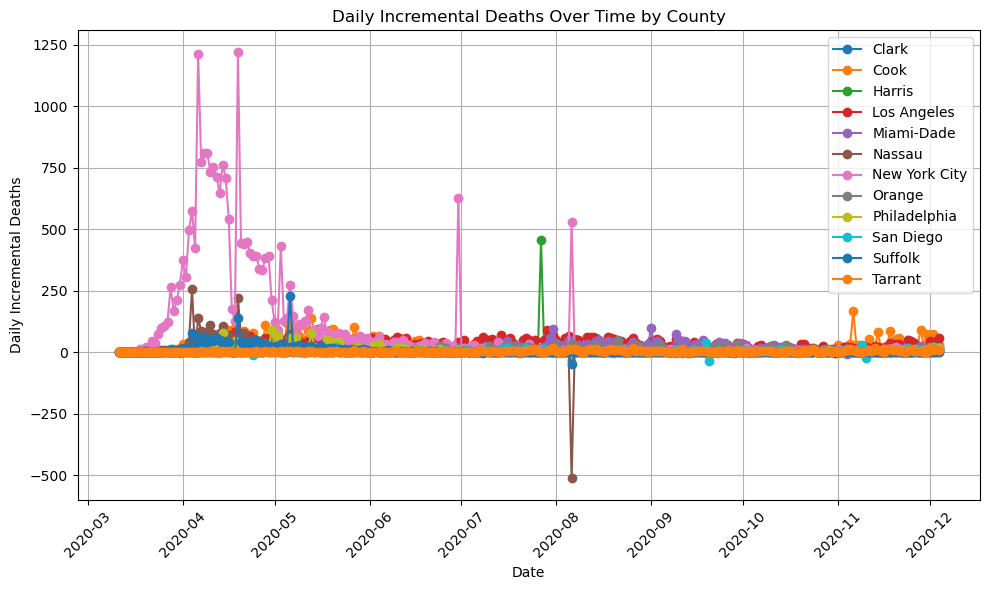

In [46]:
plt.figure(figsize=(10, 6))

for county in counties:
    county_df = df[df['county'] == county]
    county_df['DailyDeaths'] = county_df['deaths'].diff()
    plt.plot(county_df['date'], county_df['DailyDeaths'], marker='o', linestyle='-', label=county)

plt.title('Daily Incremental Deaths Over Time by County')
plt.xlabel('Date')
plt.ylabel('Daily Incremental Deaths')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### ^^^^^ ASK TEAM (THERE ARE SOME NEGATIVE DEATHS)

# 1. Seasonal Decomposition
## Plots: Incremental cases over time

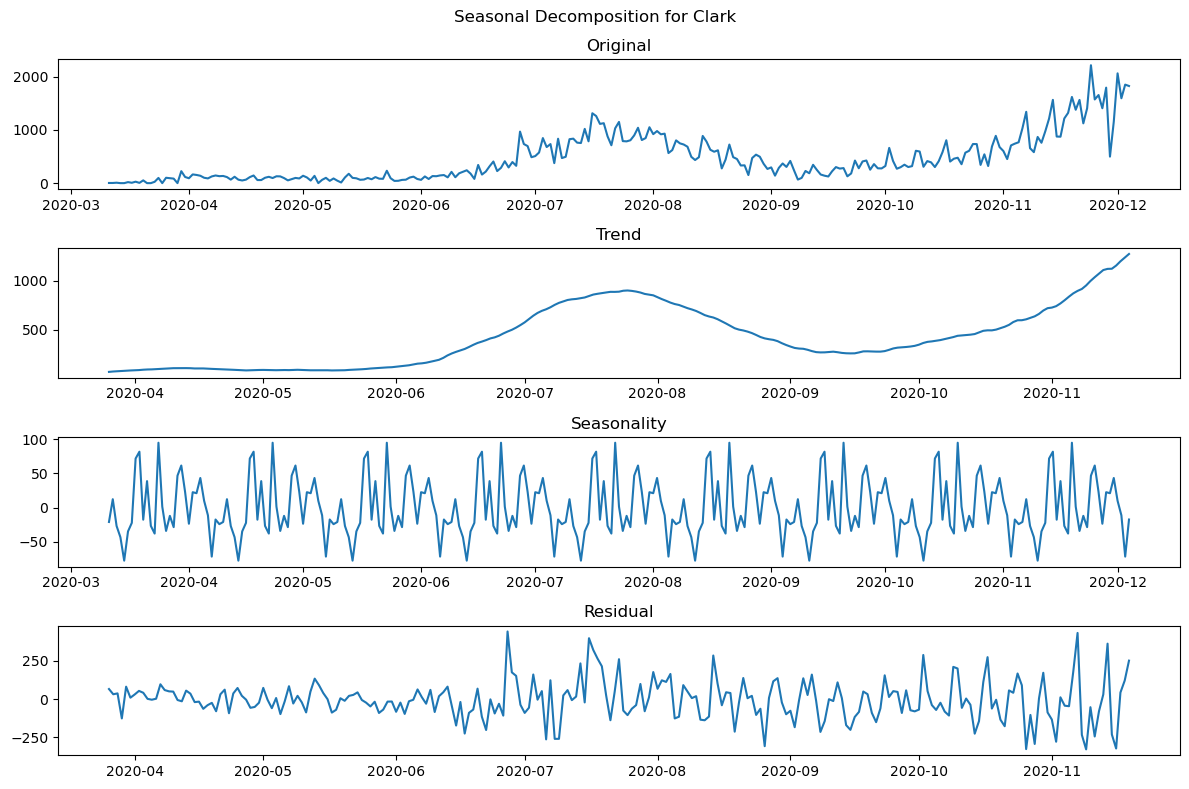

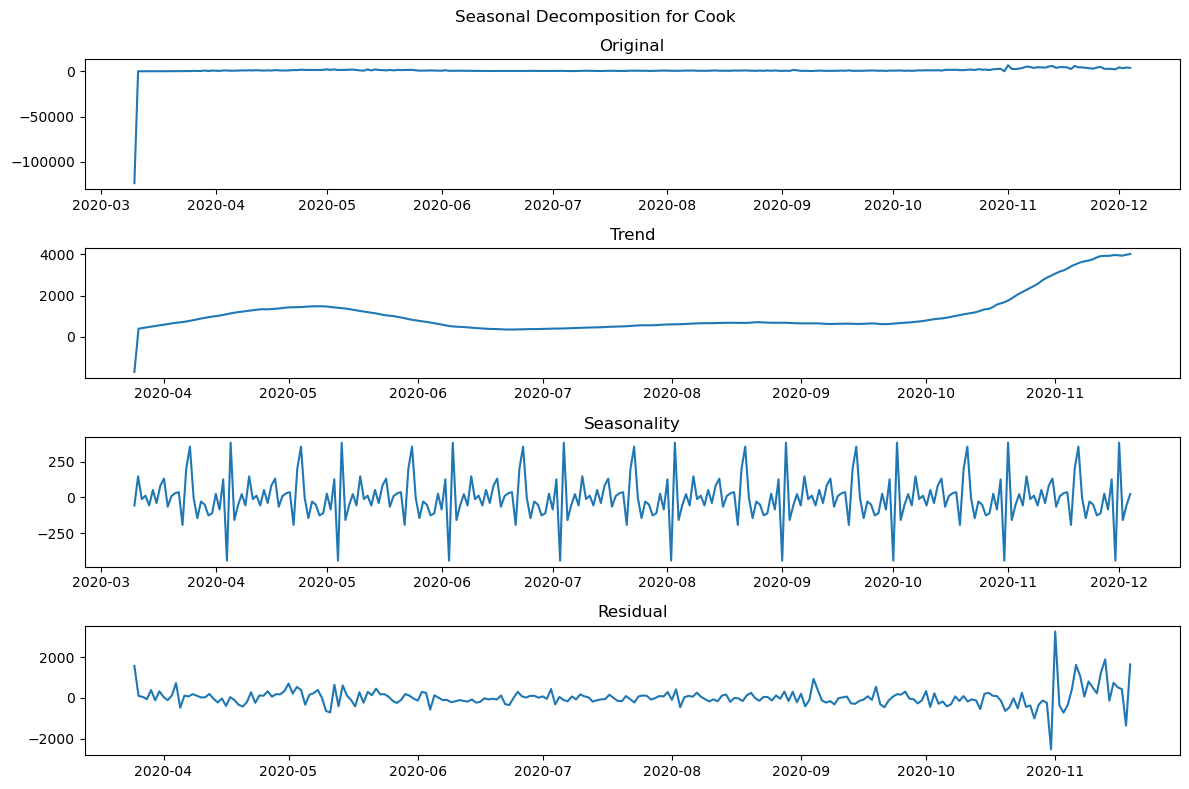

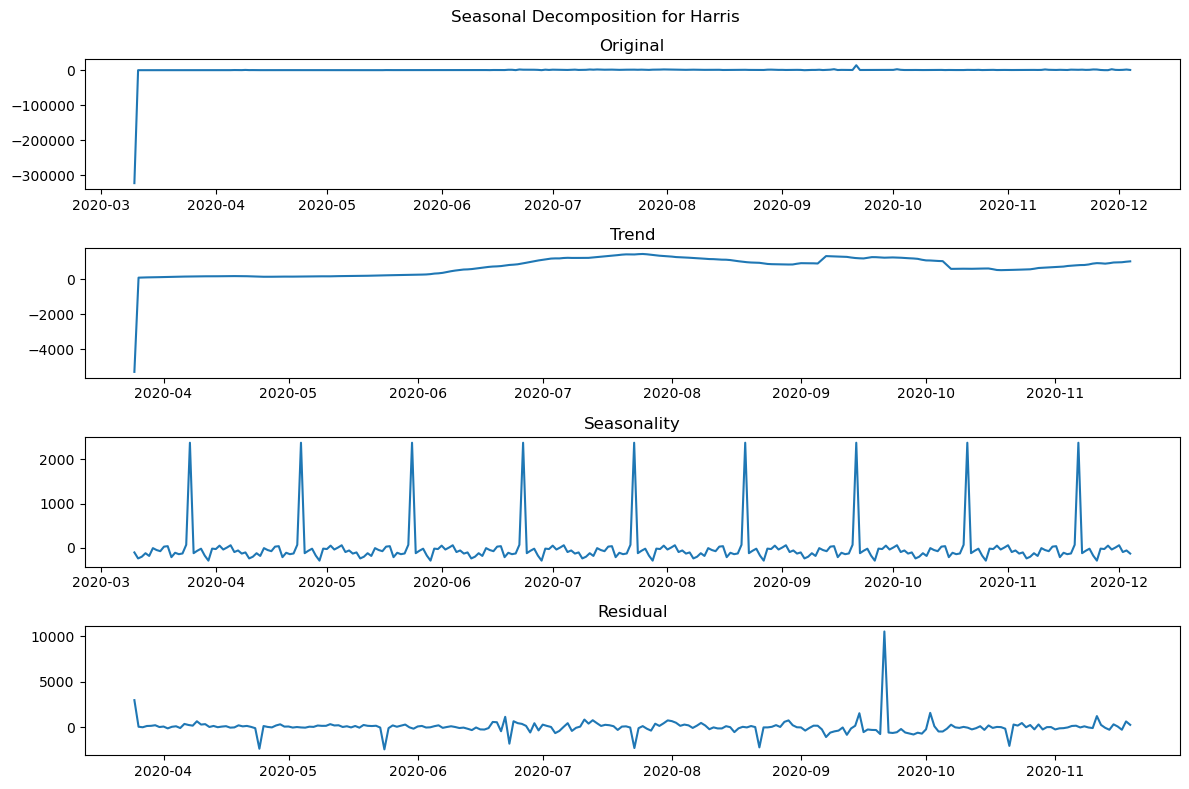

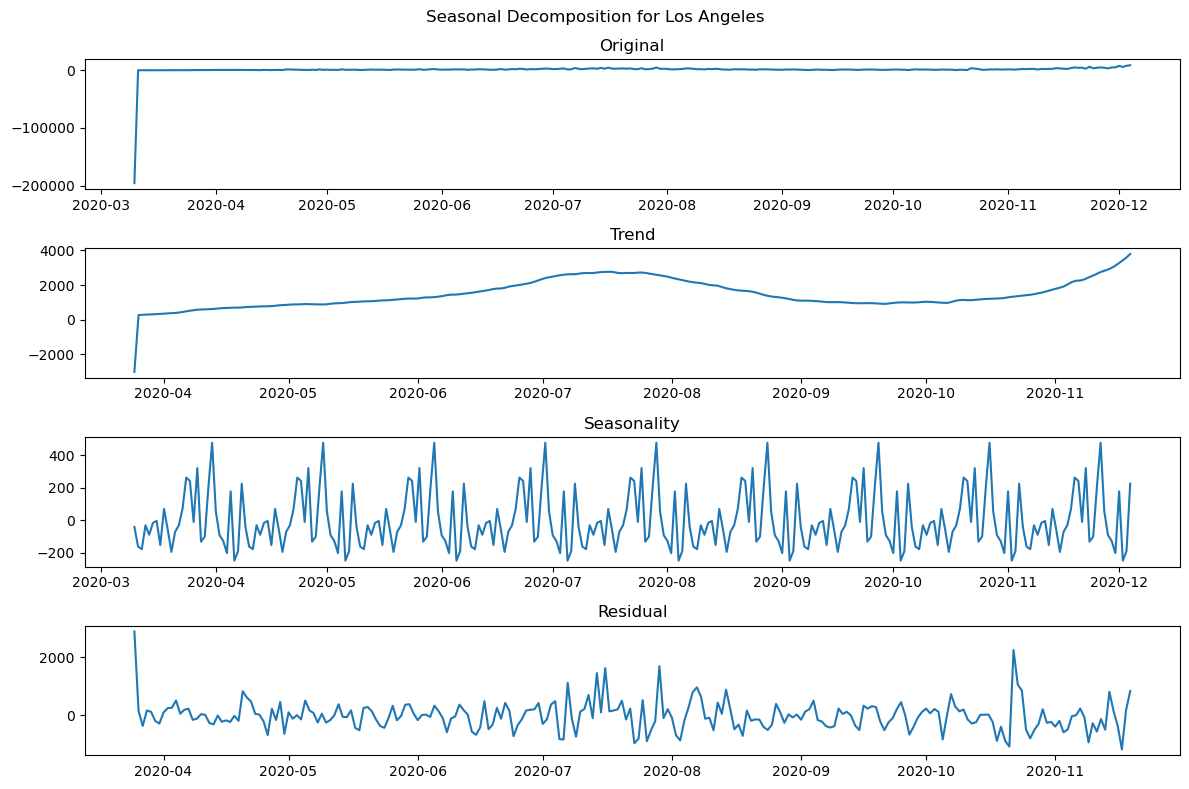

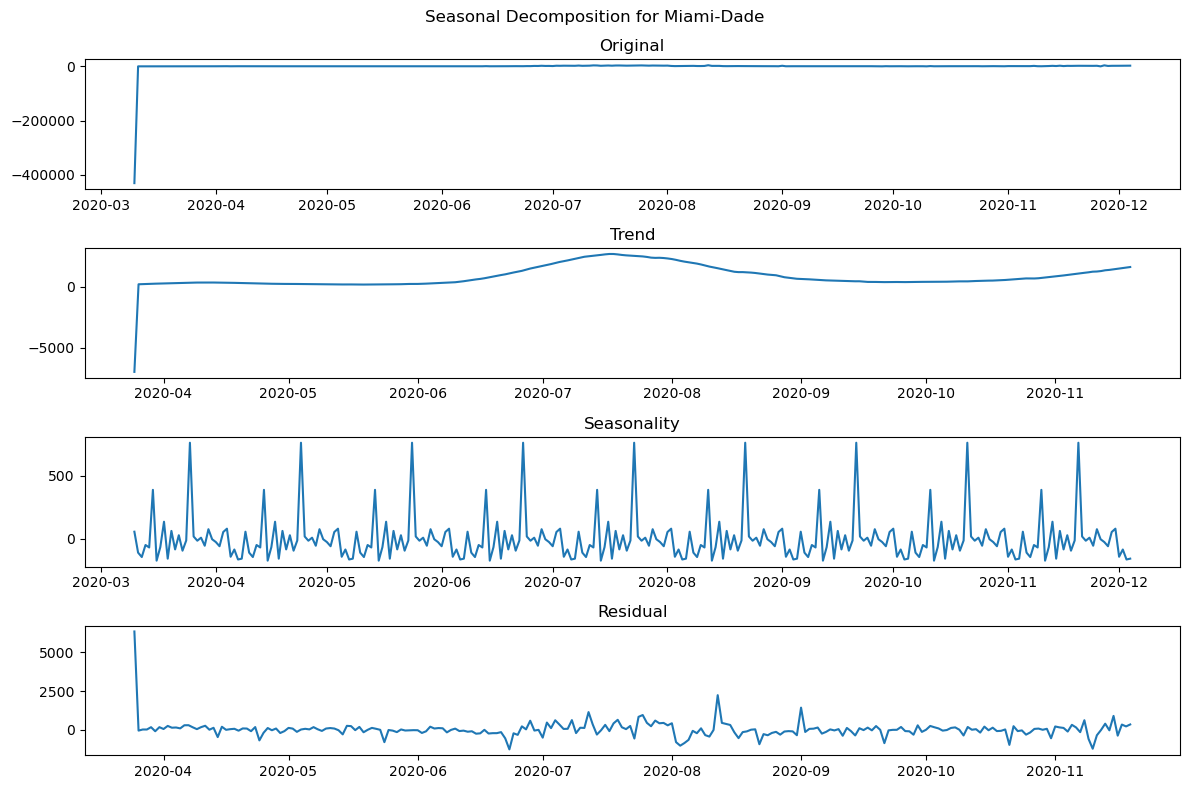

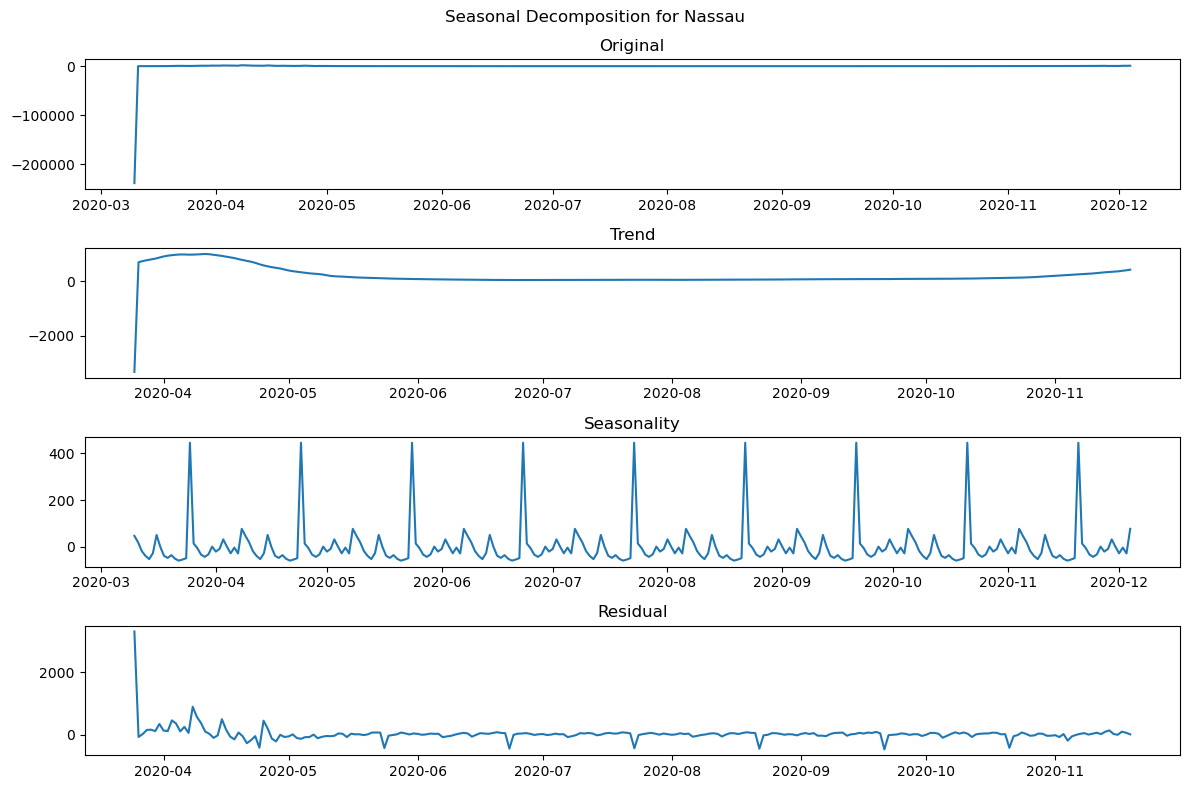

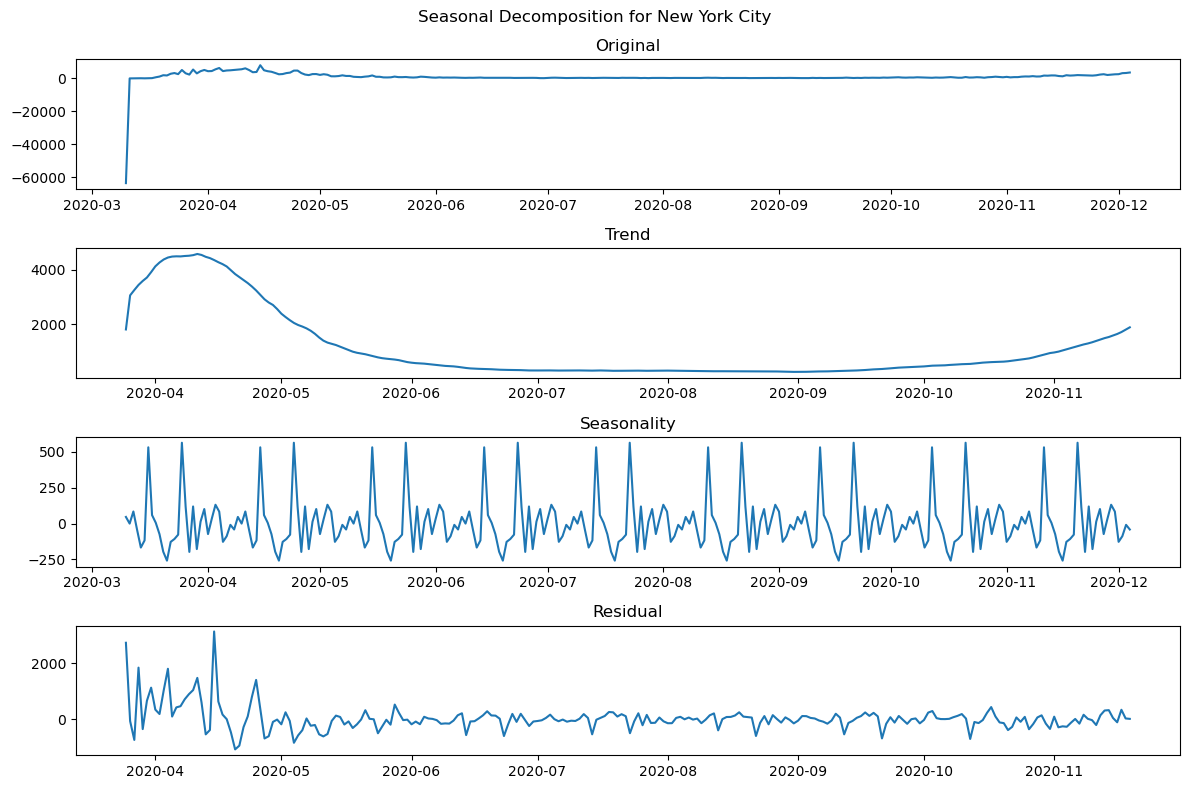

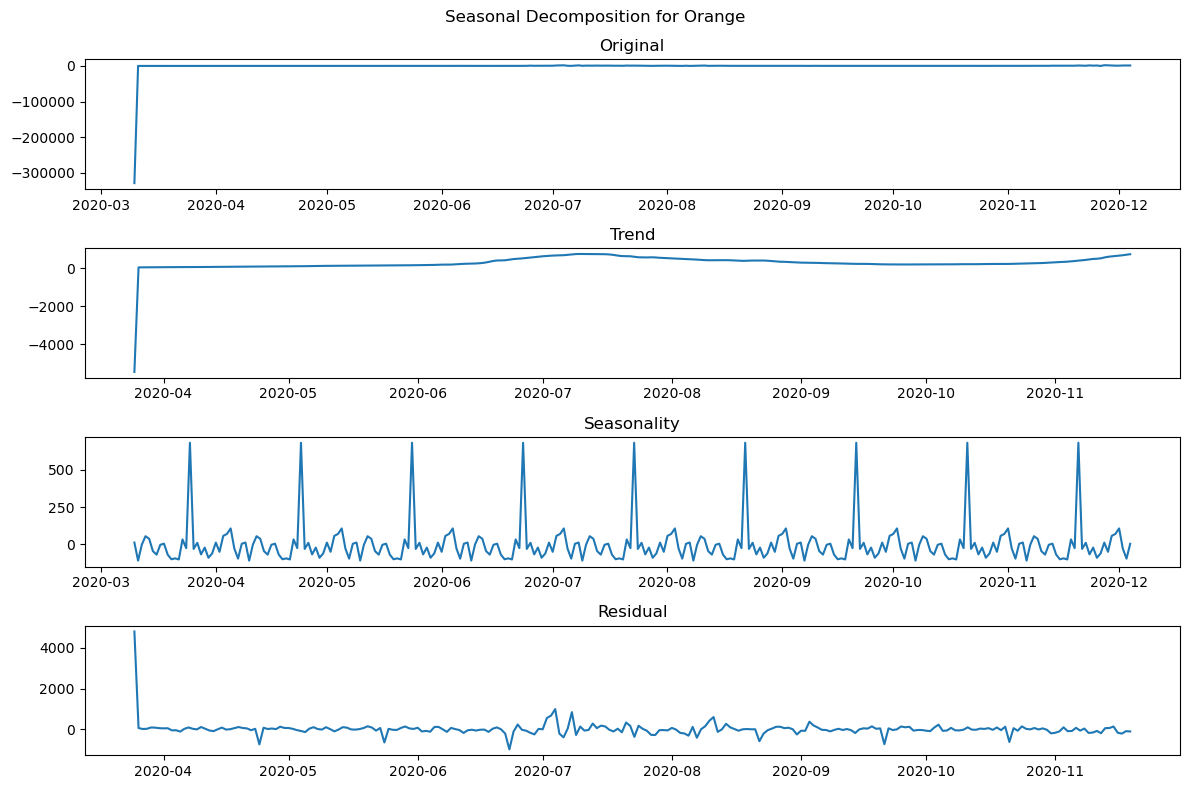

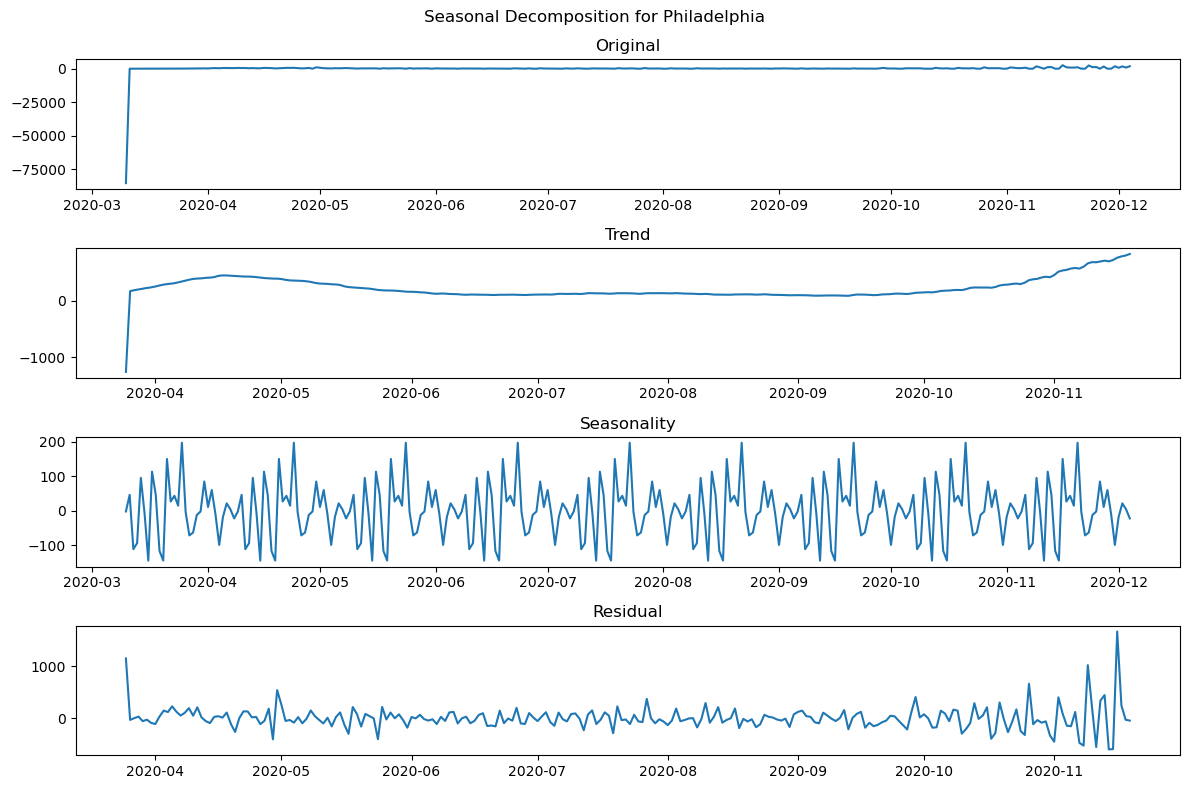

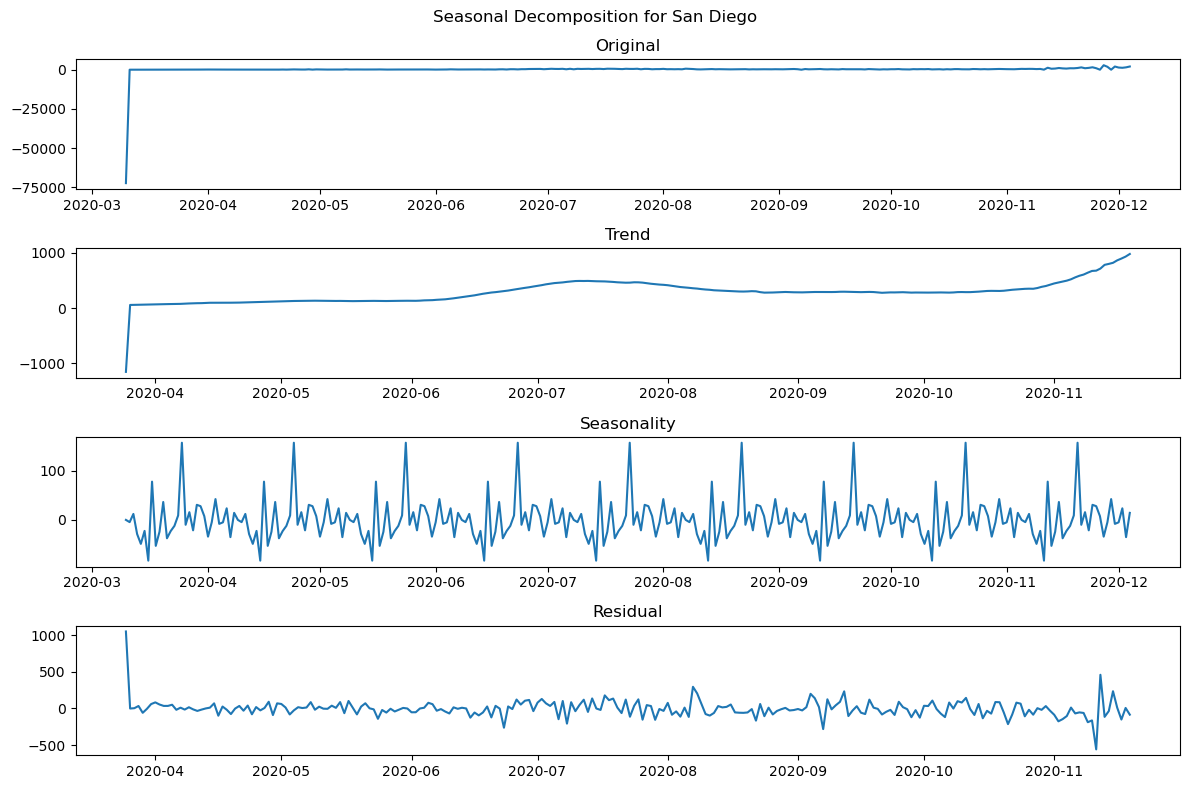

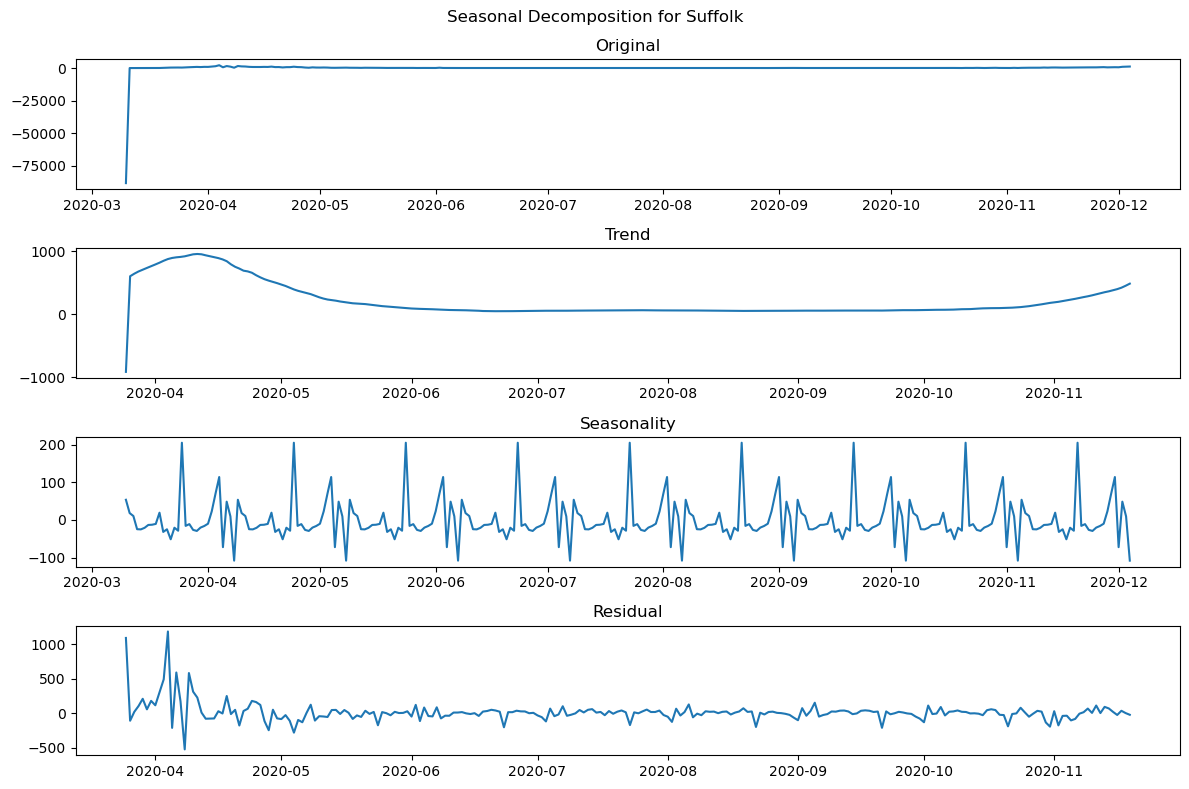

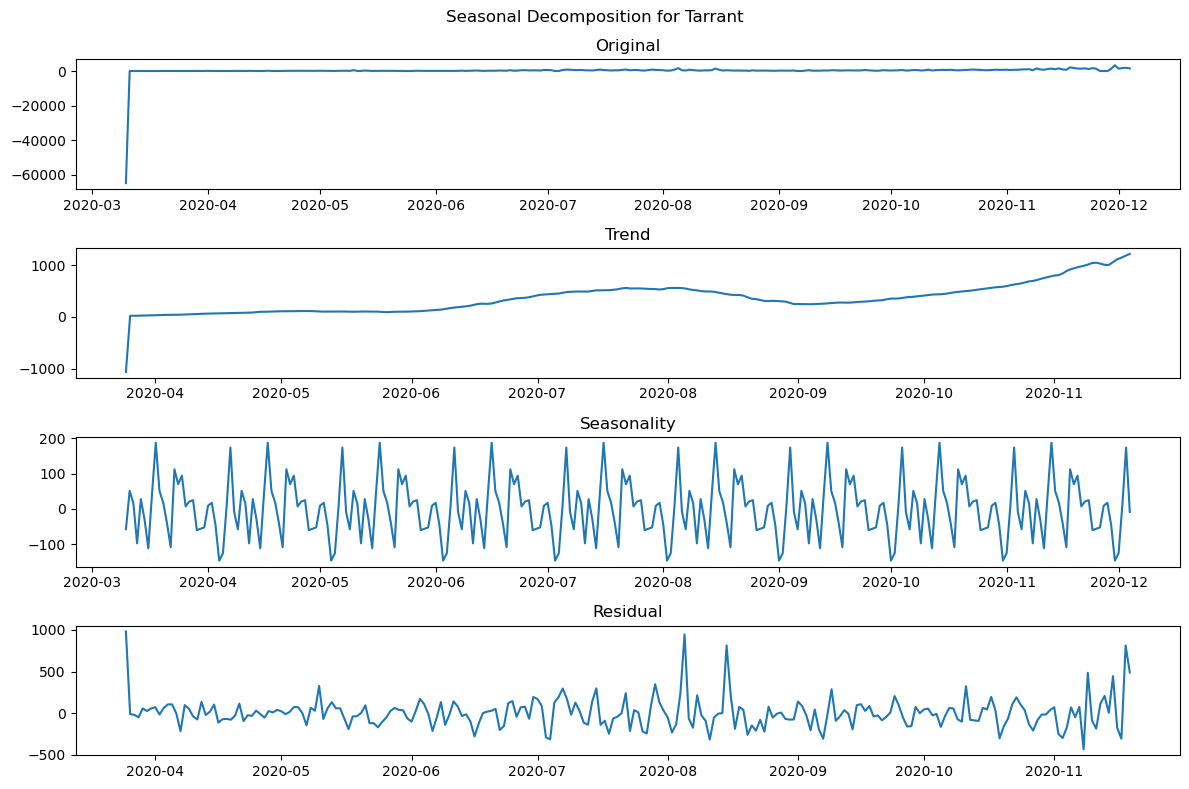

In [76]:
# Ensure 'Date' is in datetime format and set as index
#df.set_index('date', inplace=True)

# Get unique list of counties
counties = df['county'].unique()

# Dictionary to store decomposition results
decomposition_results = {}

# Perform decomposition for each county
for county in counties:
    county_data = df[df['county'] == county]['DailyCases']
    
    # Handling missing values, if necessary
    #county_data = county_data.interpolate(method='time')
    
    # Seasonal decomposition
    # Adjust the period according to your data's frequency and expected seasonality
    decomposition = seasonal_decompose(county_data.dropna(), model='additive', period=30)
    
    decomposition_results[county] = decomposition

# Now, decomposition_results dictionary contains all the decompositions

# Optional: Plotting the results for each county
for county, decomposed in decomposition_results.items():
    plt.figure(figsize=(12, 8))
    plt.suptitle(f'Seasonal Decomposition for {county}')

    plt.subplot(411)
    plt.plot(decomposed.observed)
    plt.title('Original')

    plt.subplot(412)
    plt.plot(decomposed.trend)
    plt.title('Trend')

    plt.subplot(413)
    plt.plot(decomposed.seasonal)
    plt.title('Seasonality')

    plt.subplot(414)
    plt.plot(decomposed.resid)
    plt.title('Residual')

    plt.tight_layout()
    plt.show()


## Plots: Incremental deaths over time

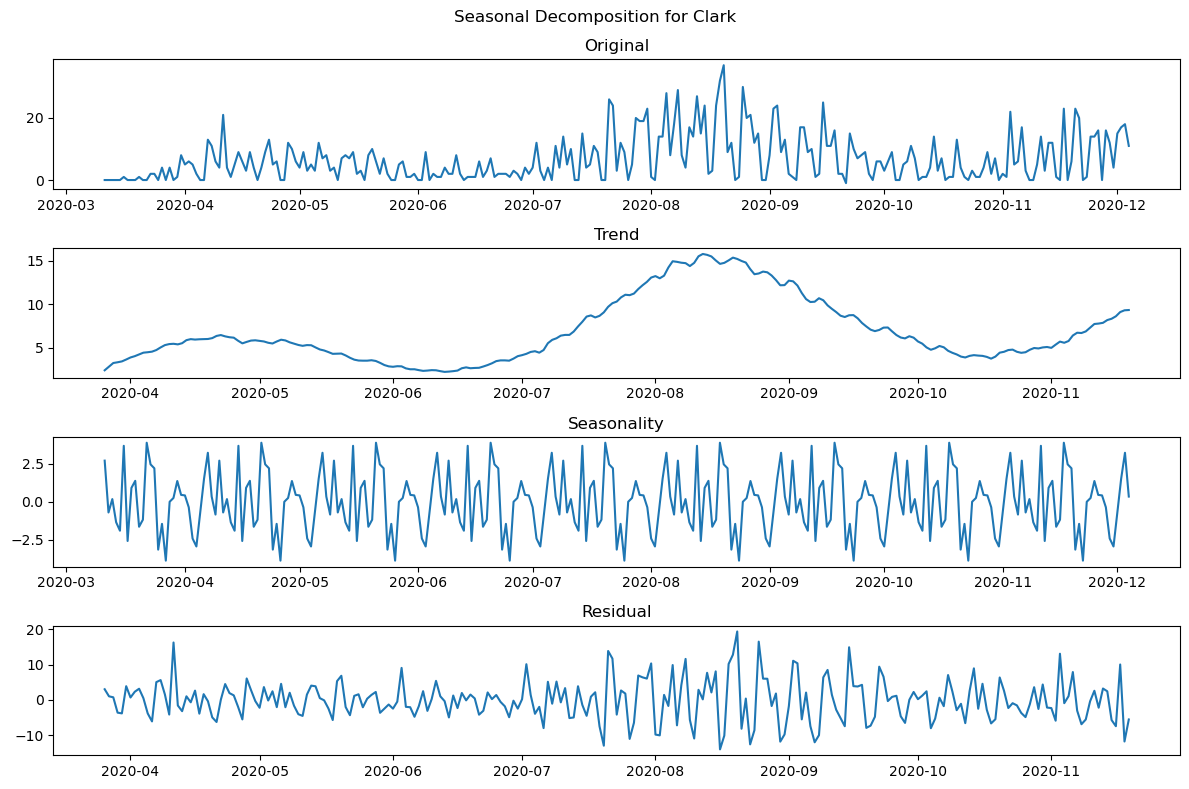

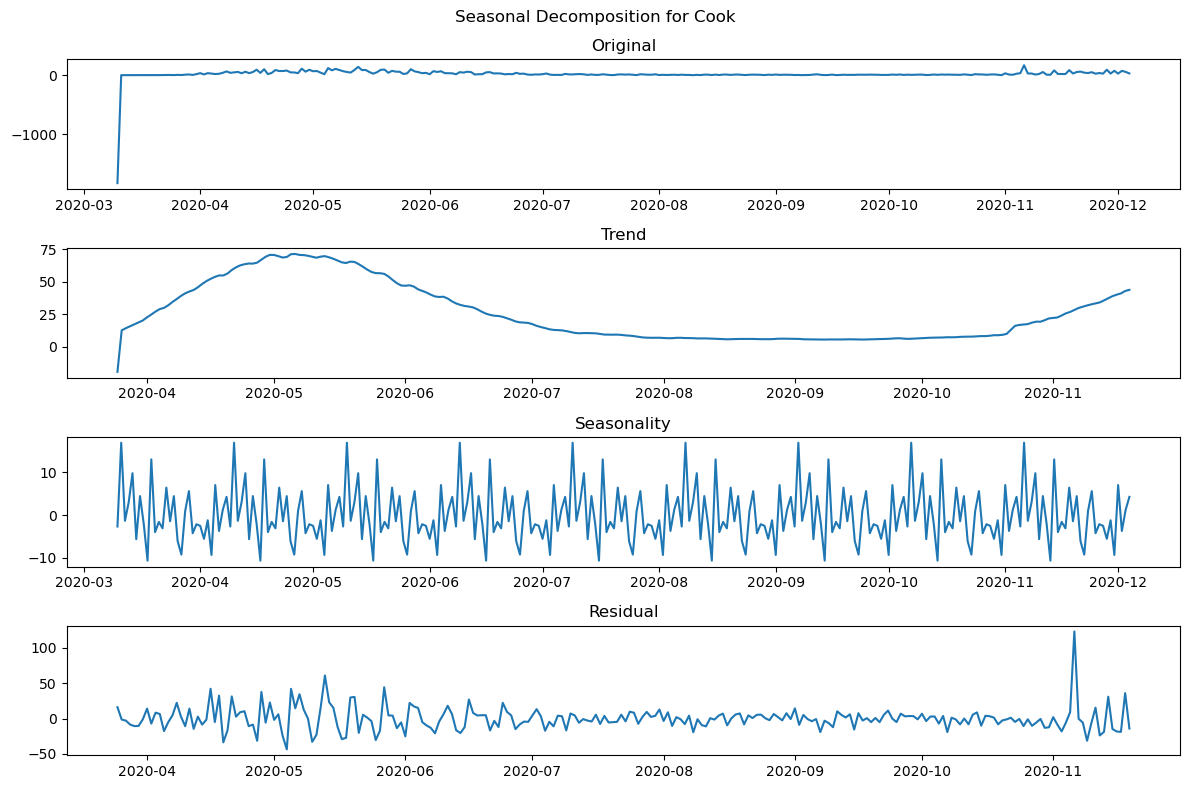

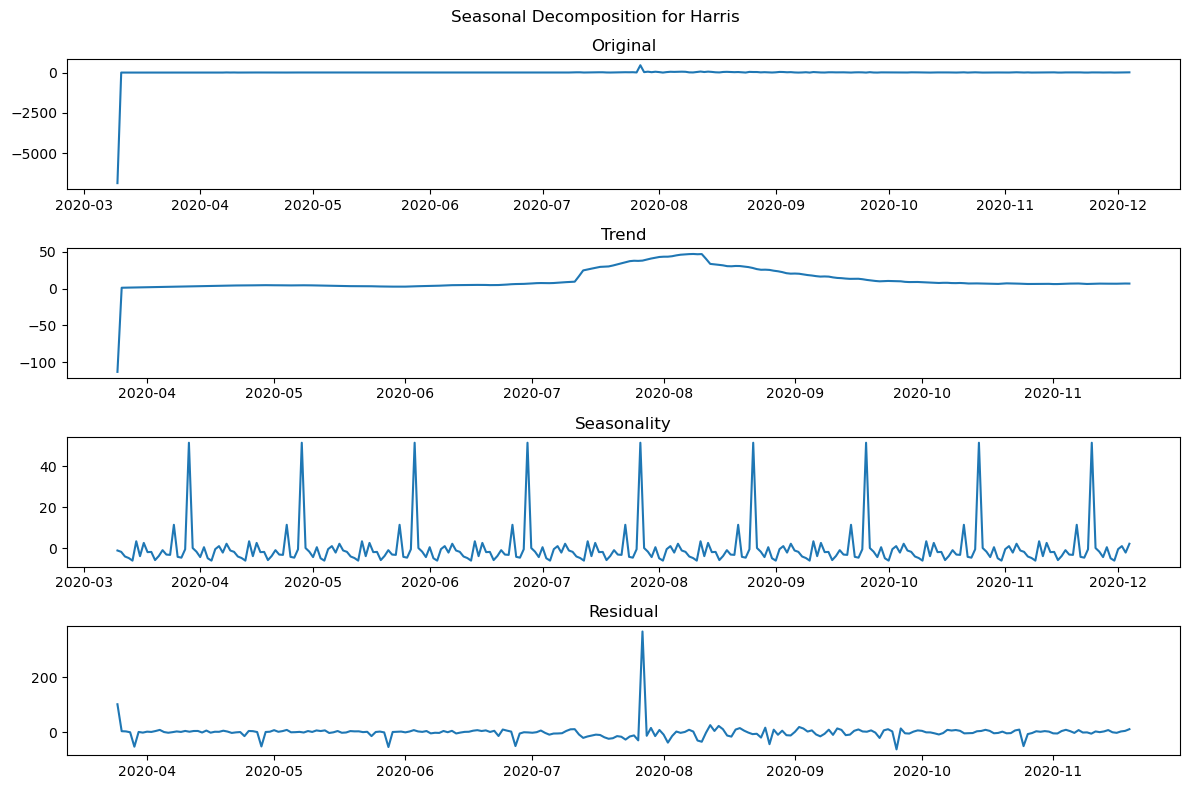

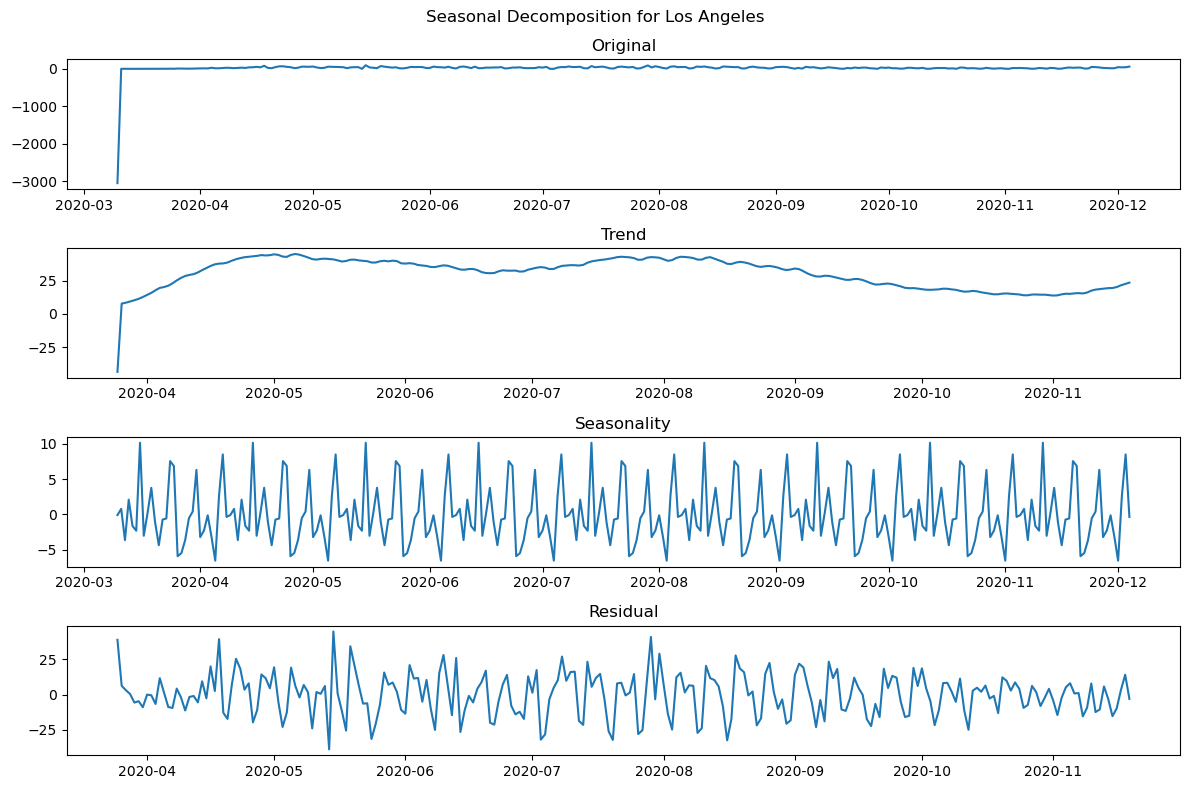

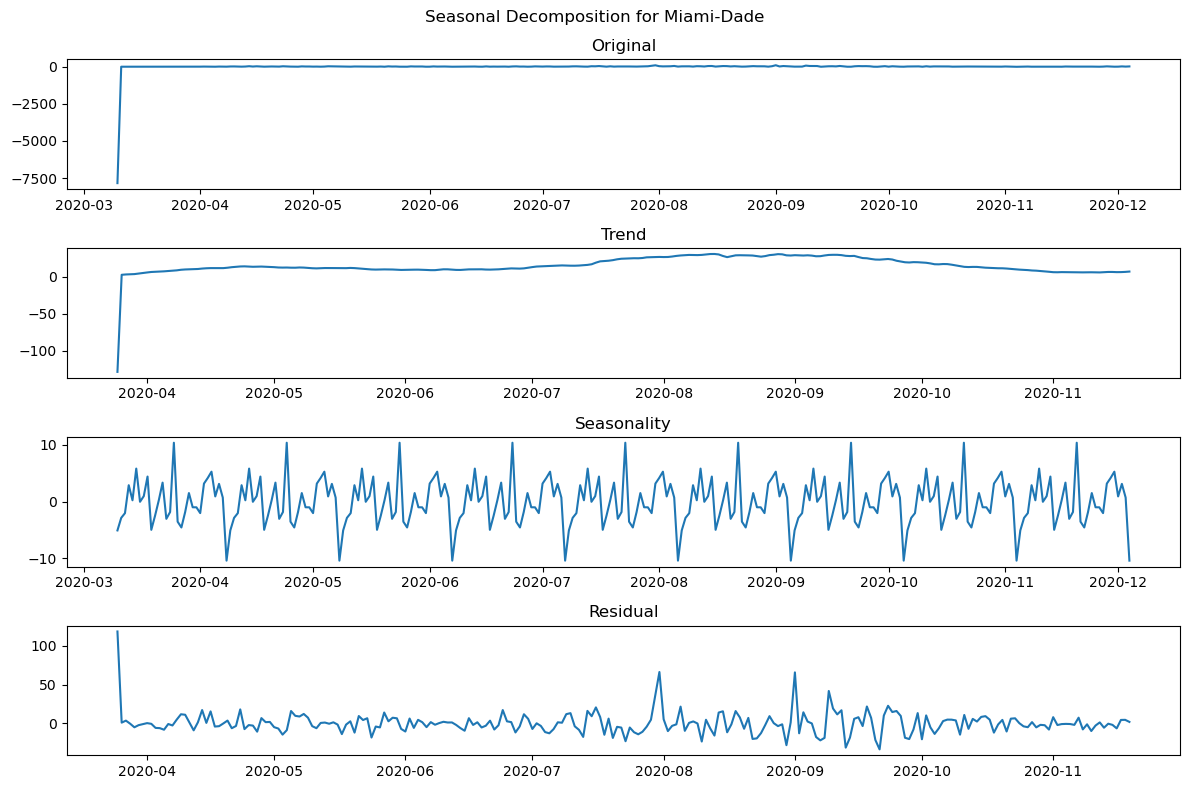

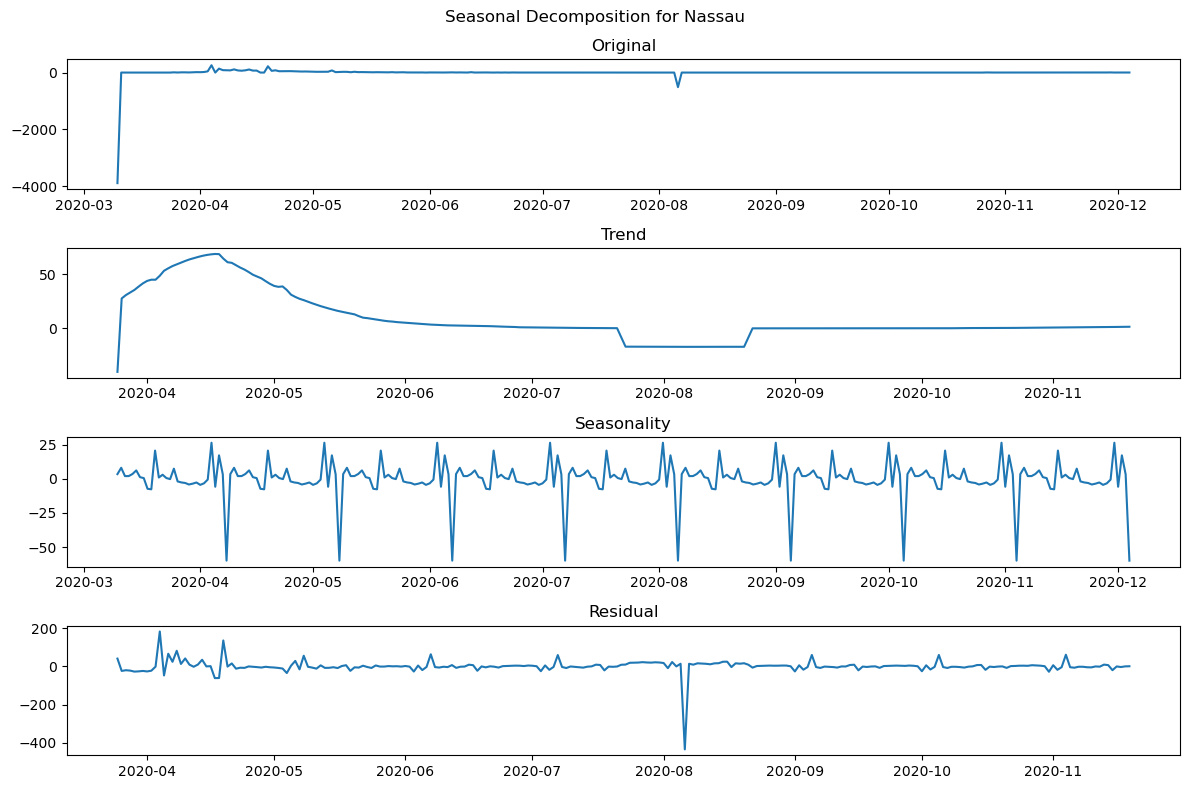

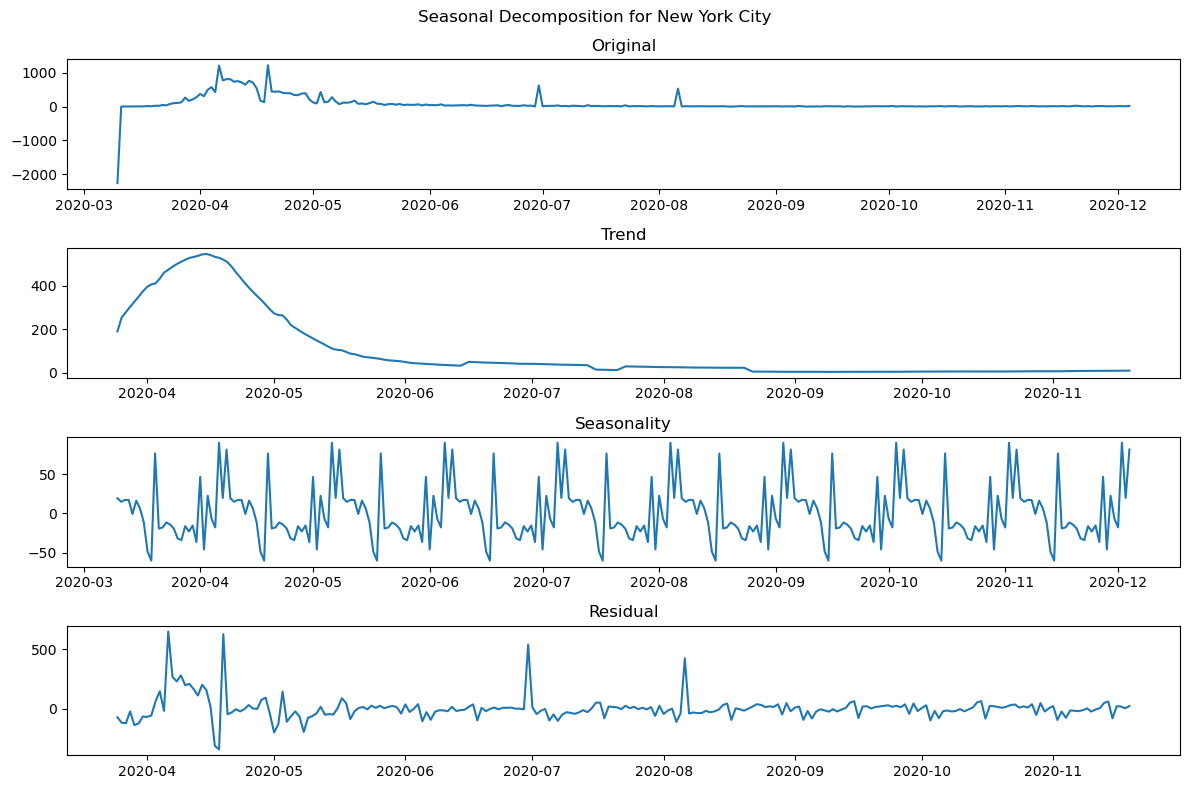

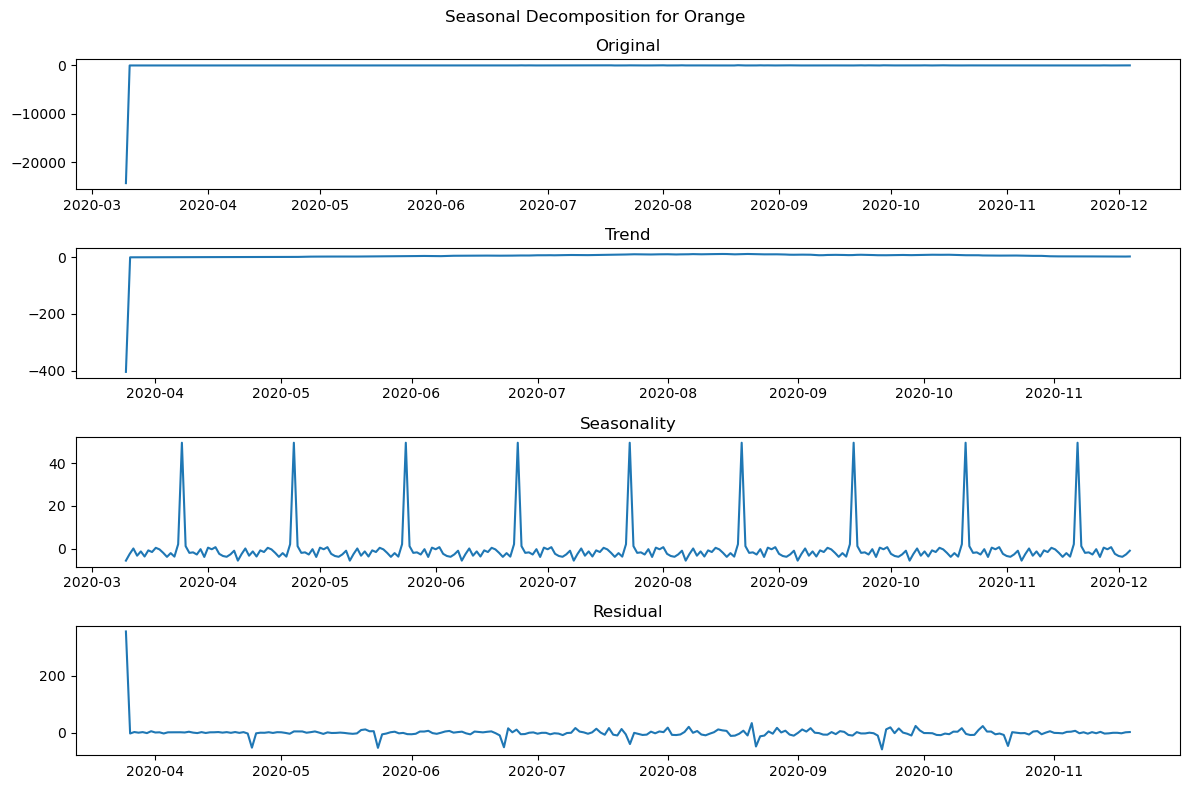

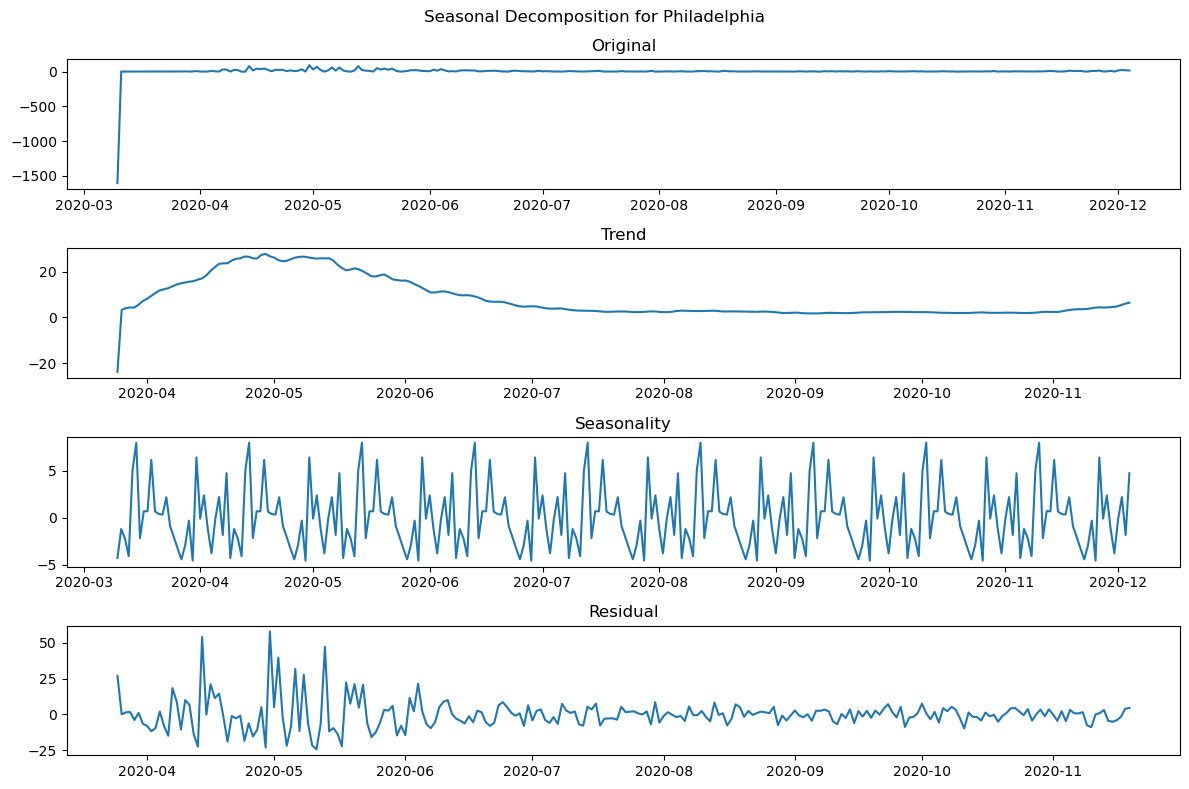

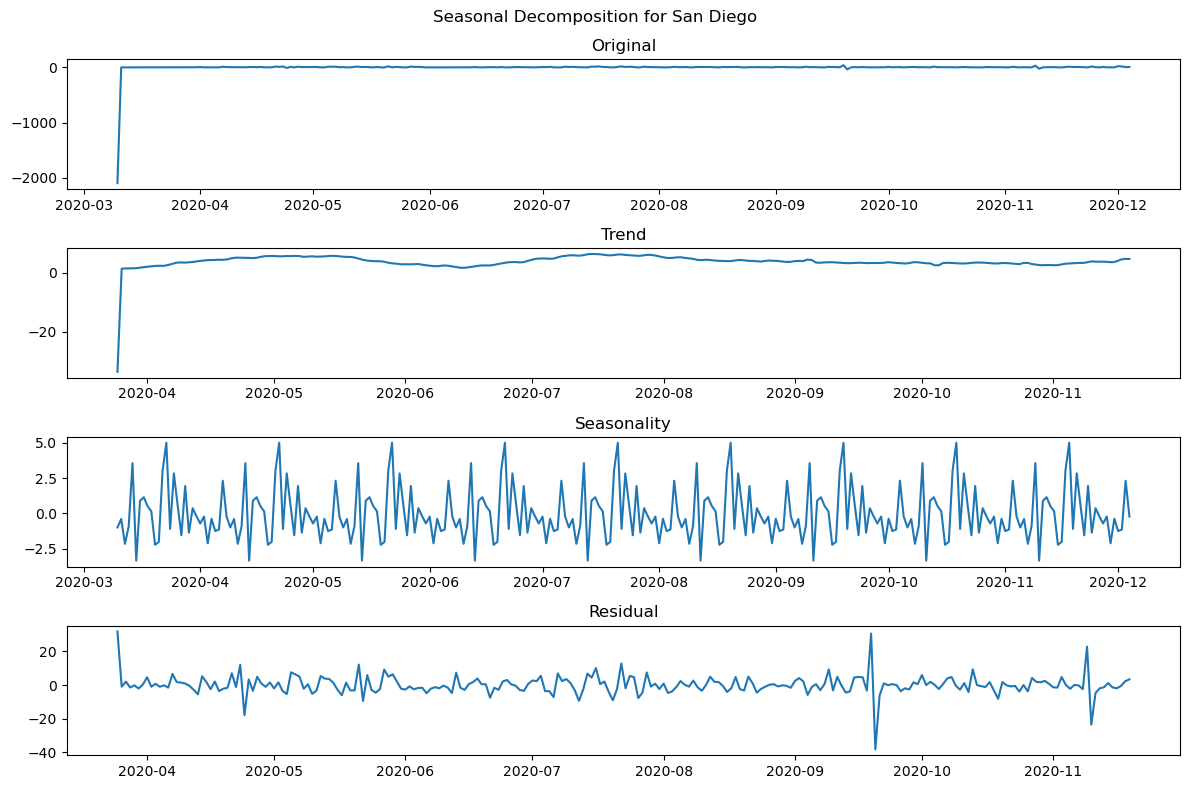

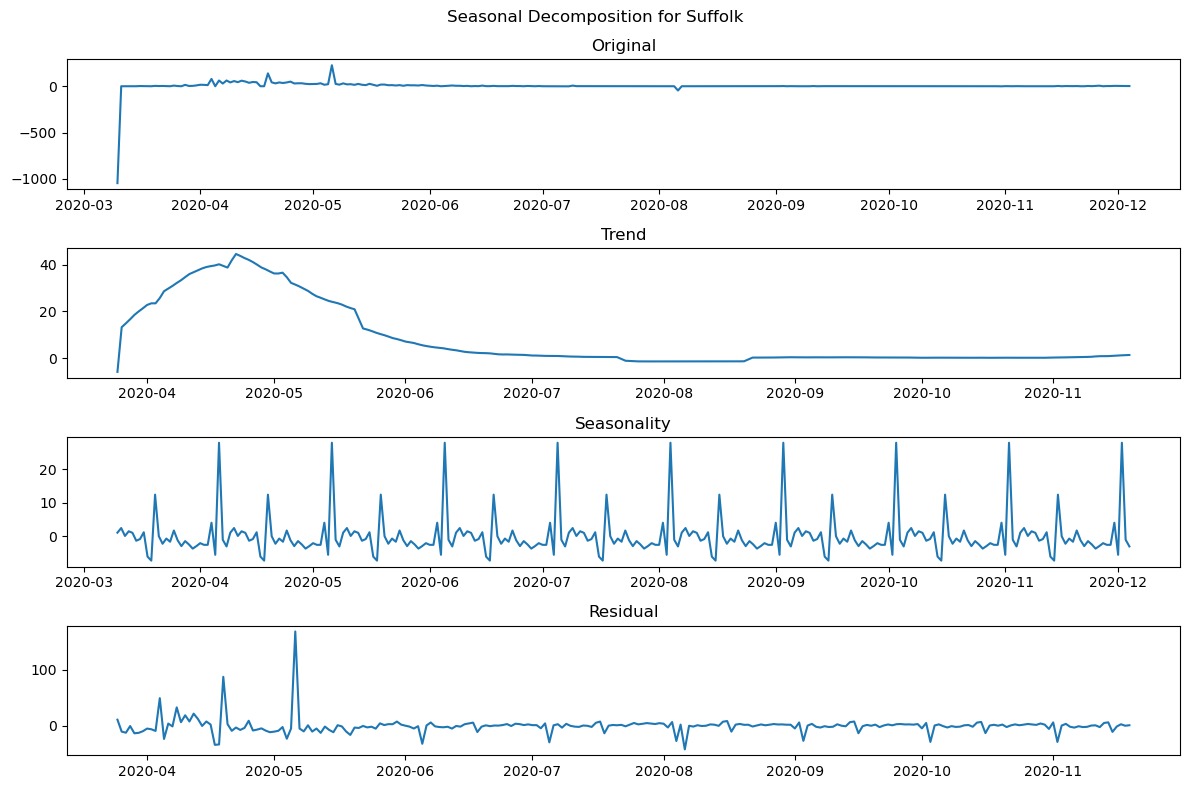

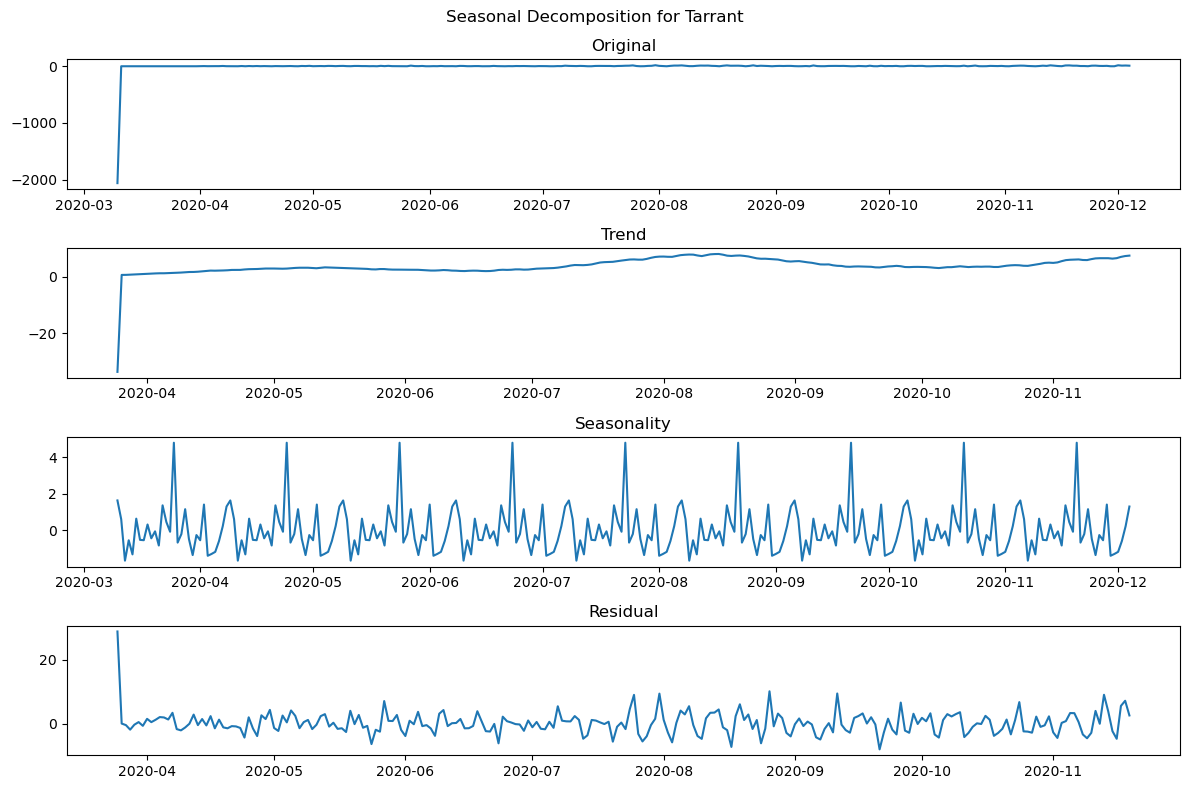

In [77]:
# Ensure 'Date' is in datetime format and set as index
#df.set_index('date', inplace=True)

# Get unique list of counties
counties = df['county'].unique()

# Dictionary to store decomposition results
decomposition_results = {}

# Perform decomposition for each county
for county in counties:
    county_data = df[df['county'] == county]['DailyDeaths']
    
    # Handling missing values, if necessary
    #county_data = county_data.interpolate(method='time')
    
    # Seasonal decomposition
    # Adjust the period according to your data's frequency and expected seasonality
    decomposition = seasonal_decompose(county_data.dropna(), model='additive', period=30)
    
    decomposition_results[county] = decomposition

# Plotting the results for each county
for county, decomposed in decomposition_results.items():
    plt.figure(figsize=(12, 8))
    plt.suptitle(f'Seasonal Decomposition for {county}')

    plt.subplot(411)
    plt.plot(decomposed.observed)
    plt.title('Original')

    plt.subplot(412)
    plt.plot(decomposed.trend)
    plt.title('Trend')

    plt.subplot(413)
    plt.plot(decomposed.seasonal)
    plt.title('Seasonality')

    plt.subplot(414)
    plt.plot(decomposed.resid)
    plt.title('Residual')

    plt.tight_layout()
    plt.show()